In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
import pickle
import xgboost
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
house=pd.read_csv('/home/rumana/Desktop/DM-Project/Data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [3]:
house.head()

RegionID  SizeRank  RegionName RegionType StateName State      City  \
0     61639         0       10025        Zip        NY    NY  New York   
1     84654         1       60657        Zip        IL    IL   Chicago   
2     61637         2       10023        Zip        NY    NY  New York   
3     91982         3       77494        Zip        TX    TX      Katy   
4     84616         4       60614        Zip        IL    IL   Chicago   

                              Metro       CountyName  2000-01-31  ...  \
0       New York-Newark-Jersey City  New York County    322869.0  ...   
1          Chicago-Naperville-Elgin      Cook County    309242.0  ...   
2       New York-Newark-Jersey City  New York County    499124.0  ...   
3  Houston-The Woodlands-Sugar Land    Harris County    224324.0  ...   
4          Chicago-Naperville-Elgin      Cook County    404572.0  ...   

   2021-01-31  2021-02-28  2021-03-31  2021-04-30  2021-05-31  2021-06-30  \
0   1099539.0   1092089.0   1081166.0   1088192.0   1095040.0   1099155.0   
1    499635.0    500978.0    500994.0    502925.0    503452.0    506248.0   
2   1454872.0   1446329.0   1433048.0   1450884.0   1445666.0   1444024.0   
3    357396.0    361965.0    367377.0    373918.0    380876.0    389624.0   
4    641826.0    643433.0    643638.0    646220.0    646370.0    648909.0   

   2021-07-31  2021-08-31  2021-09-30  2021-10-31  
0   1107819.0   1116633.0   1126935.0   1131304.0  
1    510021.0    514458.0    517014.0    519568.0  
2   1445853.0   1460074.0   1475657.0   1484187.0  
3    400359.0    411235.0    420349.0    428302.0  
4    652645.0    657641.0    660802.0    664683.0  

[5 rows x 271 columns]

In [4]:
house.tail()

RegionID  SizeRank  RegionName RegionType StateName State  \
30475     66169     34430       20052        Zip        DC    DC   
30476     89666     34430       72630        Zip        AR    AR   
30477     62532     34430       12345        Zip        OR    OR   
30478     87060     34430       66045        Zip        KS    KS   
30479     58379     34430        1470        Zip        MA    MA   

                City                            Metro            CountyName  \
30475     Washington  Washington-Arlington-Alexandria  District of Columbia   
30476   Diamond City                         Harrison          Boone County   
30477  Central Point                          Medford        Jackson County   
30478       Lawrence                         Lawrence        Douglas County   
30479         Groton          Boston-Cambridge-Newton      Middlesex County   

       2000-01-31  ...  2021-01-31  2021-02-28  2021-03-31  2021-04-30  \
30475         NaN  ...   1389886.0   1390519.0   1410412.0   1426220.0   
30476         NaN  ...    115875.0    115850.0    116918.0    117924.0   
30477         NaN  ...    158219.0    163050.0    166106.0    167607.0   
30478         NaN  ...    225846.0    229724.0    231437.0    233483.0   
30479         NaN  ...    396638.0    397226.0    392108.0    394631.0   

       2021-05-31  2021-06-30  2021-07-31  2021-08-31  2021-09-30  2021-10-31  
30475   1443350.0   1452055.0   1450792.0   1452458.0   1446318.0   1446006.0  
30476    119744.0    122206.0    122842.0    123201.0    120815.0    121144.0  
30477    171575.0    176291.0    179015.0    182157.0    184877.0    190189.0  
30478    238097.0    244744.0    250629.0    253216.0    256106.0    262157.0  
30479    398494.0    412669.0    419240.0    424199.0    426673.0    430720.0  

[5 rows x 271 columns]

In [5]:
print(house.isnull().any())


RegionID      False
SizeRank      False
RegionName    False
RegionType    False
StateName     False
              ...  
2021-06-30     True
2021-07-31     True
2021-08-31     True
2021-09-30     True
2021-10-31     True
Length: 271, dtype: bool


In [6]:
print(house.isnull().sum())

RegionID       0
SizeRank       0
RegionName     0
RegionType     0
StateName      0
              ..
2021-06-30    28
2021-07-31    38
2021-08-31    45
2021-09-30    20
2021-10-31    14
Length: 271, dtype: int64


In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30480 entries, 0 to 30479
Columns: 271 entries, RegionID to 2021-10-31
dtypes: float64(262), int64(3), object(6)
memory usage: 63.0+ MB


In [8]:
house.describe()

RegionID      SizeRank    RegionName    2000-01-31    2000-02-29  \
count   30480.000000  30480.000000  30480.000000  1.572000e+04  1.584000e+04   
mean    80413.585466  15964.537336  48829.732021  1.470488e+05  1.473024e+05   
std     25208.711322   9585.540628  27411.276689  1.160109e+05  1.165320e+05   
min     58001.000000      0.000000    501.000000  8.516000e+03  8.384000e+03   
25%     68854.750000   7693.500000  25937.500000  7.990400e+04  7.988825e+04   
50%     79211.500000  15494.000000  48380.500000  1.200370e+05  1.200210e+05   
75%     89237.250000  24056.000000  71740.500000  1.780588e+05  1.782915e+05   
max    753844.000000  34430.000000  99901.000000  2.509980e+06  2.537838e+06   

         2000-03-31    2000-04-30    2000-05-31    2000-06-30    2000-07-31  \
count  1.586500e+04  1.588800e+04  1.596300e+04  1.598700e+04  1.600200e+04   
mean   1.477382e+05  1.488002e+05  1.498138e+05  1.508135e+05  1.518930e+05   
std    1.172409e+05  1.187935e+05  1.202965e+05  1.219632e+05  1.236122e+05   
min    8.343000e+03  8.281000e+03  8.358000e+03  8.458000e+03  8.586000e+03   
25%    8.003900e+04  8.037250e+04  8.068150e+04  8.097600e+04  8.133025e+04   
50%    1.202000e+05  1.207640e+05  1.213950e+05  1.219150e+05  1.222720e+05   
75%    1.787070e+05  1.797925e+05  1.808445e+05  1.818955e+05  1.829602e+05   
max    2.575210e+06  2.651883e+06  2.740823e+06  2.834743e+06  2.922571e+06   

       ...    2021-01-31    2021-02-28    2021-03-31    2021-04-30  \
count  ...  2.983700e+04  3.040100e+04  3.041300e+04  3.042600e+04   
mean   ...  2.491687e+05  2.511814e+05  2.544499e+05  2.577651e+05   
std    ...  2.516628e+05  2.515793e+05  2.535011e+05  2.566011e+05   
min    ...  1.441700e+04  1.444200e+04  1.436600e+04  1.427700e+04   
25%    ...  1.146360e+05  1.165610e+05  1.181130e+05  1.194505e+05   
50%    ...  1.813200e+05  1.834040e+05  1.861610e+05  1.884290e+05   
75%    ...  2.945170e+05  2.969590e+05  3.009610e+05  3.054875e+05   
max    ...  6.614337e+06  6.614050e+06  6.566681e+06  6.622663e+06   

         2021-05-31    2021-06-30    2021-07-31    2021-08-31    2021-09-30  \
count  3.039000e+04  3.045200e+04  3.044200e+04  3.043500e+04  3.046000e+04   
mean   2.615882e+05  2.661760e+05  2.710670e+05  2.754771e+05  2.790982e+05   
std    2.612954e+05  2.671124e+05  2.736262e+05  2.787510e+05  2.823557e+05   
min    1.417000e+04  1.421800e+04  1.432100e+04  1.444100e+04  1.461500e+04   
25%    1.205910e+05  1.221378e+05  1.235125e+05  1.249235e+05  1.264050e+05   
50%    1.906850e+05  1.932555e+05  1.961195e+05  1.984520e+05  2.010120e+05   
75%    3.104492e+05  3.164330e+05  3.225082e+05  3.283415e+05  3.334605e+05   
max    6.744243e+06  6.935881e+06  7.085825e+06  7.223638e+06  7.340026e+06   

         2021-10-31  
count  3.046600e+04  
mean   2.820368e+05  
std    2.847990e+05  
min    1.474600e+04  
25%    1.275880e+05  
50%    2.032085e+05  
75%    3.373428e+05  
max    7.421010e+06  

[8 rows x 265 columns]

In [9]:
Price_H=house[house['RegionName'].astype(str)=='Denver, CO']
Price_H

Empty DataFrame
Columns: [RegionID, SizeRank, RegionName, RegionType, StateName, State, City, Metro, CountyName, 2000-01-31, 2000-02-29, 2000-03-31, 2000-04-30, 2000-05-31, 2000-06-30, 2000-07-31, 2000-08-31, 2000-09-30, 2000-10-31, 2000-11-30, 2000-12-31, 2001-01-31, 2001-02-28, 2001-03-31, 2001-04-30, 2001-05-31, 2001-06-30, 2001-07-31, 2001-08-31, 2001-09-30, 2001-10-31, 2001-11-30, 2001-12-31, 2002-01-31, 2002-02-28, 2002-03-31, 2002-04-30, 2002-05-31, 2002-06-30, 2002-07-31, 2002-08-31, 2002-09-30, 2002-10-31, 2002-11-30, 2002-12-31, 2003-01-31, 2003-02-28, 2003-03-31, 2003-04-30, 2003-05-31, 2003-06-30, 2003-07-31, 2003-08-31, 2003-09-30, 2003-10-31, 2003-11-30, 2003-12-31, 2004-01-31, 2004-02-29, 2004-03-31, 2004-04-30, 2004-05-31, 2004-06-30, 2004-07-31, 2004-08-31, 2004-09-30, 2004-10-31, 2004-11-30, 2004-12-31, 2005-01-31, 2005-02-28, 2005-03-31, 2005-04-30, 2005-05-31, 2005-06-30, 2005-07-31, 2005-08-31, 2005-09-30, 2005-10-31, 2005-11-30, 2005-12-31, 2006-01-31, 2006-02-28, 2006-03-31, 2006-04-30, 2006-05-31, 2006-06-30, 2006-07-31, 2006-08-31, 2006-09-30, 2006-10-31, 2006-11-30, 2006-12-31, 2007-01-31, 2007-02-28, 2007-03-31, 2007-04-30, 2007-05-31, 2007-06-30, 2007-07-31, ...]
Index: []

[0 rows x 271 columns]

In [10]:
house.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '2000-01-31',
       ...
       '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
       '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31'],
      dtype='object', length=271)

In [11]:
House_data=house.iloc[:, 9:].copy()

In [12]:
House_Data_without_Price=house.iloc[:,0:9].copy()
House_Data_without_Price

RegionID  SizeRank  RegionName RegionType StateName State  \
0         61639         0       10025        Zip        NY    NY   
1         84654         1       60657        Zip        IL    IL   
2         61637         2       10023        Zip        NY    NY   
3         91982         3       77494        Zip        TX    TX   
4         84616         4       60614        Zip        IL    IL   
...         ...       ...         ...        ...       ...   ...   
30475     66169     34430       20052        Zip        DC    DC   
30476     89666     34430       72630        Zip        AR    AR   
30477     62532     34430       12345        Zip        OR    OR   
30478     87060     34430       66045        Zip        KS    KS   
30479     58379     34430        1470        Zip        MA    MA   

                City                             Metro            CountyName  
0           New York       New York-Newark-Jersey City       New York County  
1            Chicago          Chicago-Naperville-Elgin           Cook County  
2           New York       New York-Newark-Jersey City       New York County  
3               Katy  Houston-The Woodlands-Sugar Land         Harris County  
4            Chicago          Chicago-Naperville-Elgin           Cook County  
...              ...                               ...                   ...  
30475     Washington   Washington-Arlington-Alexandria  District of Columbia  
30476   Diamond City                          Harrison          Boone County  
30477  Central Point                           Medford        Jackson County  
30478       Lawrence                          Lawrence        Douglas County  
30479         Groton           Boston-Cambridge-Newton      Middlesex County  

[30480 rows x 9 columns]

In [13]:
House_data

2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  \
0        322869.0    327712.0    331597.0    340071.0    347722.0    355041.0   
1        309242.0    310679.0    312629.0    316377.0    320207.0    323952.0   
2        499124.0    502962.0    505658.0    512326.0    520244.0    530961.0   
3        224324.0    224642.0    225365.0    226591.0    226154.0    225818.0   
4        404572.0    405709.0    407859.0    411613.0    416152.0    420501.0   
...           ...         ...         ...         ...         ...         ...   
30475         NaN         NaN         NaN         NaN         NaN         NaN   
30476         NaN         NaN         NaN         NaN         NaN         NaN   
30477         NaN         NaN         NaN         NaN         NaN         NaN   
30478         NaN         NaN         NaN         NaN         NaN         NaN   
30479         NaN         NaN         NaN         NaN         NaN         NaN   

       2000-07-31  2000-08-31  2000-09-30  2000-10-31  ...  2021-01-31  \
0        362744.0    368966.0    374421.0    379241.0  ...   1099539.0   
1        327820.0    332176.0    335969.0    339738.0  ...    499635.0   
2        541356.0    549908.0    555664.0    562593.0  ...   1454872.0   
3        224700.0    225041.0    224644.0    225316.0  ...    357396.0   
4        425083.0    429949.0    434096.0    439050.0  ...    641826.0   
...           ...         ...         ...         ...  ...         ...   
30475         NaN         NaN         NaN         NaN  ...   1389886.0   
30476         NaN         NaN         NaN         NaN  ...    115875.0   
30477         NaN         NaN         NaN         NaN  ...    158219.0   
30478         NaN         NaN         NaN         NaN  ...    225846.0   
30479         NaN         NaN         NaN         NaN  ...    396638.0   

       2021-02-28  2021-03-31  2021-04-30  2021-05-31  2021-06-30  2021-07-31  \
0       1092089.0   1081166.0   1088192.0   1095040.0   1099155.0   1107819.0   
1        500978.0    500994.0    502925.0    503452.0    506248.0    510021.0   
2       1446329.0   1433048.0   1450884.0   1445666.0   1444024.0   1445853.0   
3        361965.0    367377.0    373918.0    380876.0    389624.0    400359.0   
4        643433.0    643638.0    646220.0    646370.0    648909.0    652645.0   
...           ...         ...         ...         ...         ...         ...   
30475   1390519.0   1410412.0   1426220.0   1443350.0   1452055.0   1450792.0   
30476    115850.0    116918.0    117924.0    119744.0    122206.0    122842.0   
30477    163050.0    166106.0    167607.0    171575.0    176291.0    179015.0   
30478    229724.0    231437.0    233483.0    238097.0    244744.0    250629.0   
30479    397226.0    392108.0    394631.0    398494.0    412669.0    419240.0   

       2021-08-31  2021-09-30  2021-10-31  
0       1116633.0   1126935.0   1131304.0  
1        514458.0    517014.0    519568.0  
2       1460074.0   1475657.0   1484187.0  
3        411235.0    420349.0    428302.0  
4        657641.0    660802.0    664683.0  
...           ...         ...         ...  
30475   1452458.0   1446318.0   1446006.0  
30476    123201.0    120815.0    121144.0  
30477    182157.0    184877.0    190189.0  
30478    253216.0    256106.0    262157.0  
30479    424199.0    426673.0    430720.0  

[30480 rows x 262 columns]

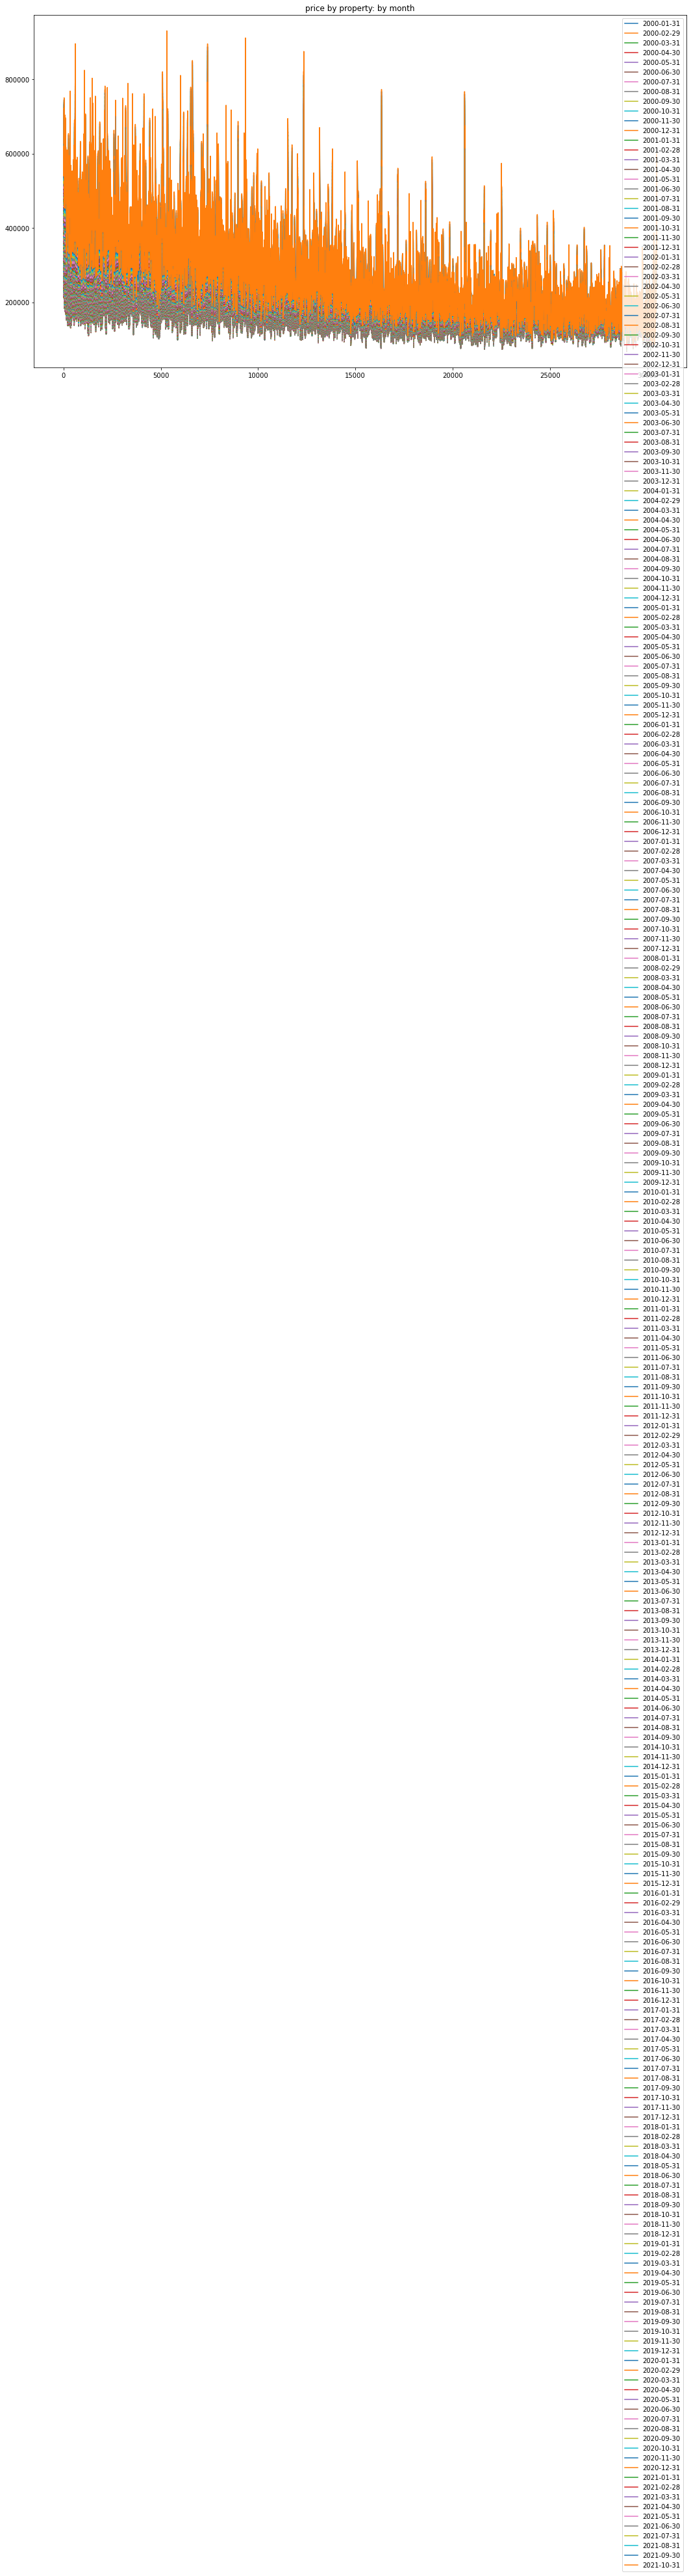

In [14]:
House_data.rolling(12).mean().plot(figsize=(18,10),
                                    title="price by property: by month")

In [15]:
missing_counts = pd.DataFrame({'variable_name':House_data.columns,
                                 'num_of_missing_values':list(House_data.isnull().sum())})


In [16]:
missing_counts.head(30)

variable_name  num_of_missing_values
0     2000-01-31                  14760
1     2000-02-29                  14640
2     2000-03-31                  14615
3     2000-04-30                  14592
4     2000-05-31                  14517
5     2000-06-30                  14493
6     2000-07-31                  14478
7     2000-08-31                  14450
8     2000-09-30                  14428
9     2000-10-31                  14406
10    2000-11-30                  14379
11    2000-12-31                  14359
12    2001-01-31                  14200
13    2001-02-28                  14161
14    2001-03-31                  14111
15    2001-04-30                  14072
16    2001-05-31                  14034
17    2001-06-30                  14015
18    2001-07-31                  13998
19    2001-08-31                  13953
20    2001-09-30                  13893
21    2001-10-31                  13861
22    2001-11-30                  13833
23    2001-12-31                  13809
24    2002-01-31                  13764
25    2002-02-28                  13752
26    2002-03-31                  13711
27    2002-04-30                  13543
28    2002-05-31                  13449
29    2002-06-30                  13370

In [17]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

House_data_imputed = pd.DataFrame(imp_mean.fit_transform(House_data),
                                           columns=House_data.columns)

In [18]:
House_data_imputed

2000-01-31     2000-02-29     2000-03-31     2000-04-30  \
0      322869.00000  327712.000000  331597.000000  340071.000000   
1      309242.00000  310679.000000  312629.000000  316377.000000   
2      499124.00000  502962.000000  505658.000000  512326.000000   
3      224324.00000  224642.000000  225365.000000  226591.000000   
4      404572.00000  405709.000000  407859.000000  411613.000000   
...             ...            ...            ...            ...   
30475  147048.75986  147302.413699  147738.225339  148800.186808   
30476  147048.75986  147302.413699  147738.225339  148800.186808   
30477  147048.75986  147302.413699  147738.225339  148800.186808   
30478  147048.75986  147302.413699  147738.225339  148800.186808   
30479  147048.75986  147302.413699  147738.225339  148800.186808   

          2000-05-31     2000-06-30     2000-07-31     2000-08-31  \
0      347722.000000  355041.000000  362744.000000  368966.000000   
1      320207.000000  323952.000000  327820.000000  332176.000000   
2      520244.000000  530961.000000  541356.000000  549908.000000   
3      226154.000000  225818.000000  224700.000000  225041.000000   
4      416152.000000  420501.000000  425083.000000  429949.000000   
...              ...            ...            ...            ...   
30475  149813.760571  150813.526428  151893.035871  153002.060387   
30476  149813.760571  150813.526428  151893.035871  153002.060387   
30477  149813.760571  150813.526428  151893.035871  153002.060387   
30478  149813.760571  150813.526428  151893.035871  153002.060387   
30479  149813.760571  150813.526428  151893.035871  153002.060387   

          2000-09-30     2000-10-31  ...  2021-01-31  2021-02-28  2021-03-31  \
0      374421.000000  379241.000000  ...   1099539.0   1092089.0   1081166.0   
1      335969.000000  339738.000000  ...    499635.0    500978.0    500994.0   
2      555664.000000  562593.000000  ...   1454872.0   1446329.0   1433048.0   
3      224644.000000  225316.000000  ...    357396.0    361965.0    367377.0   
4      434096.000000  439050.000000  ...    641826.0    643433.0    643638.0   
...              ...            ...  ...         ...         ...         ...   
30475  154120.912223  155256.116897  ...   1389886.0   1390519.0   1410412.0   
30476  154120.912223  155256.116897  ...    115875.0    115850.0    116918.0   
30477  154120.912223  155256.116897  ...    158219.0    163050.0    166106.0   
30478  154120.912223  155256.116897  ...    225846.0    229724.0    231437.0   
30479  154120.912223  155256.116897  ...    396638.0    397226.0    392108.0   

       2021-04-30  2021-05-31  2021-06-30  2021-07-31  2021-08-31  2021-09-30  \
0       1088192.0   1095040.0   1099155.0   1107819.0   1116633.0   1126935.0   
1        502925.0    503452.0    506248.0    510021.0    514458.0    517014.0   
2       1450884.0   1445666.0   1444024.0   1445853.0   1460074.0   1475657.0   
3        373918.0    380876.0    389624.0    400359.0    411235.0    420349.0   
4        646220.0    646370.0    648909.0    652645.0    657641.0    660802.0   
...           ...         ...         ...         ...         ...         ...   
30475   1426220.0   1443350.0   1452055.0   1450792.0   1452458.0   1446318.0   
30476    117924.0    119744.0    122206.0    122842.0    123201.0    120815.0   
30477    167607.0    171575.0    176291.0    179015.0    182157.0    184877.0   
30478    233483.0    238097.0    244744.0    250629.0    253216.0    256106.0   
30479    394631.0    398494.0    412669.0    419240.0    424199.0    426673.0   

       2021-10-31  
0       1131304.0  
1        519568.0  
2       1484187.0  
3        428302.0  
4        664683.0  
...           ...  
30475   1446006.0  
30476    121144.0  
30477    190189.0  
30478    262157.0  
30479    430720.0  

[30480 rows x 262 columns]

Text(0, 0.5, 'price of house')

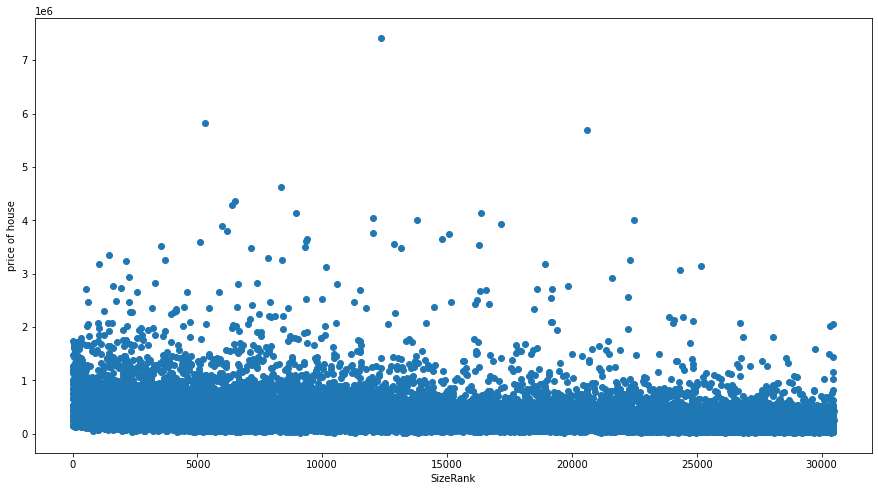

In [24]:
plt.figure(figsize=(15,8))
plt.scatter(House_data_imputed.index,House_data_imputed['2021-10-31'])
plt.xlabel('SizeRank')
plt.ylabel('price of house')

In [25]:
House_Data_without_Price['Avg_Price']=House_data_imputed.mean(axis=1)

In [26]:
House_Data_without_Price

RegionID  SizeRank  RegionName RegionType StateName State  \
0         61639         0       10025        Zip        NY    NY   
1         84654         1       60657        Zip        IL    IL   
2         61637         2       10023        Zip        NY    NY   
3         91982         3       77494        Zip        TX    TX   
4         84616         4       60614        Zip        IL    IL   
...         ...       ...         ...        ...       ...   ...   
30475     66169     34430       20052        Zip        DC    DC   
30476     89666     34430       72630        Zip        AR    AR   
30477     62532     34430       12345        Zip        OR    OR   
30478     87060     34430       66045        Zip        KS    KS   
30479     58379     34430        1470        Zip        MA    MA   

                City                             Metro            CountyName  \
0           New York       New York-Newark-Jersey City       New York County   
1            Chicago          Chicago-Naperville-Elgin           Cook County   
2           New York       New York-Newark-Jersey City       New York County   
3               Katy  Houston-The Woodlands-Sugar Land         Harris County   
4            Chicago          Chicago-Naperville-Elgin           Cook County   
...              ...                               ...                   ...   
30475     Washington   Washington-Arlington-Alexandria  District of Columbia   
30476   Diamond City                          Harrison          Boone County   
30477  Central Point                           Medford        Jackson County   
30478       Lawrence                          Lawrence        Douglas County   
30479         Groton           Boston-Cambridge-Newton      Middlesex County   

          Avg_Price  
0      8.055678e+05  
1      4.404393e+05  
2      1.116856e+06  
3      2.839376e+05  
4      5.664782e+05  
...             ...  
30475  6.224886e+05  
30476  1.927871e+05  
30477  1.645391e+05  
30478  1.974991e+05  
30479  2.417843e+05  

[30480 rows x 10 columns]

Text(0, 0.5, 'price of house')

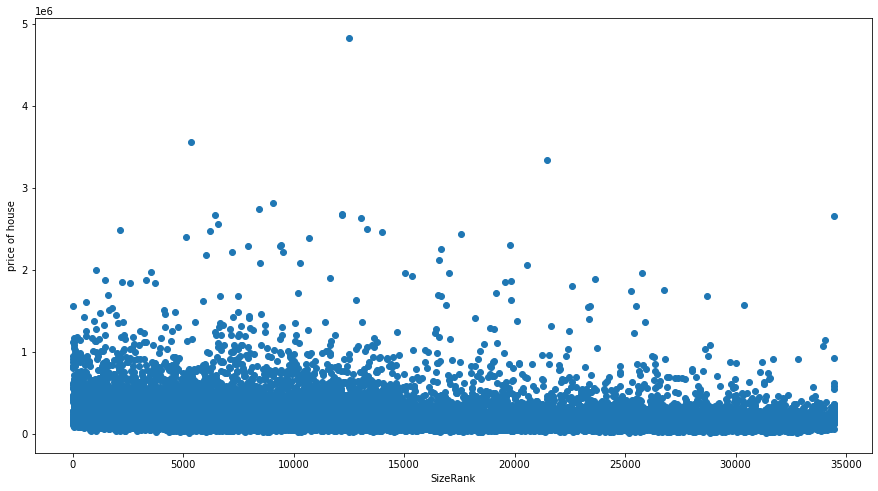

In [27]:
plt.figure(figsize=(15,8))
plt.scatter(House_Data_without_Price.SizeRank,House_Data_without_Price.Avg_Price)
plt.xlabel('SizeRank')
plt.ylabel('price of house')

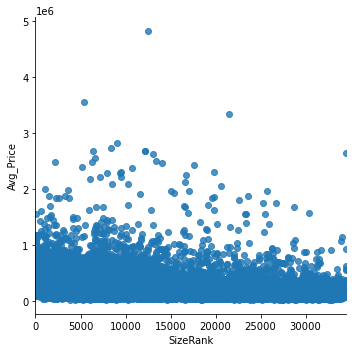

In [28]:
sns.lmplot('SizeRank','Avg_Price',data=House_Data_without_Price)

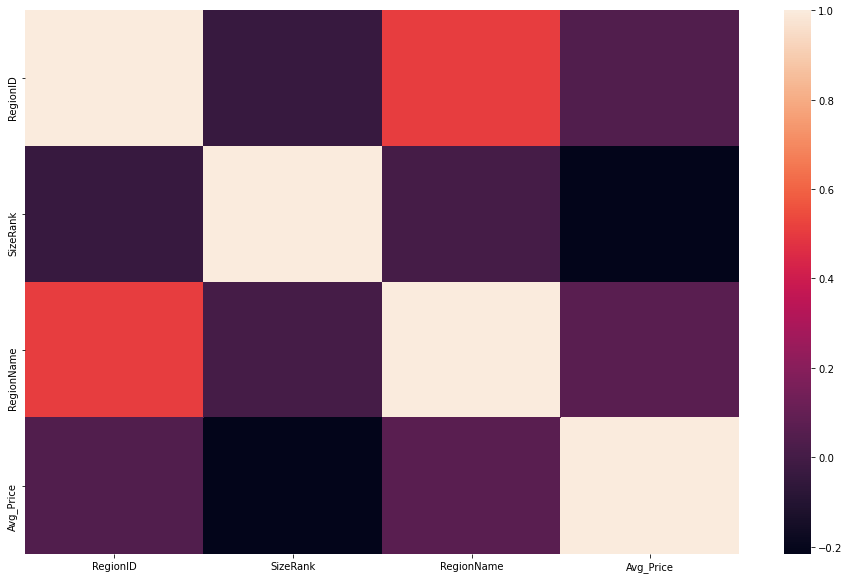

In [29]:
#corr -correlation matrix
fig = plt.figure(1, figsize=(16, 10))
sns.heatmap(House_Data_without_Price.corr())

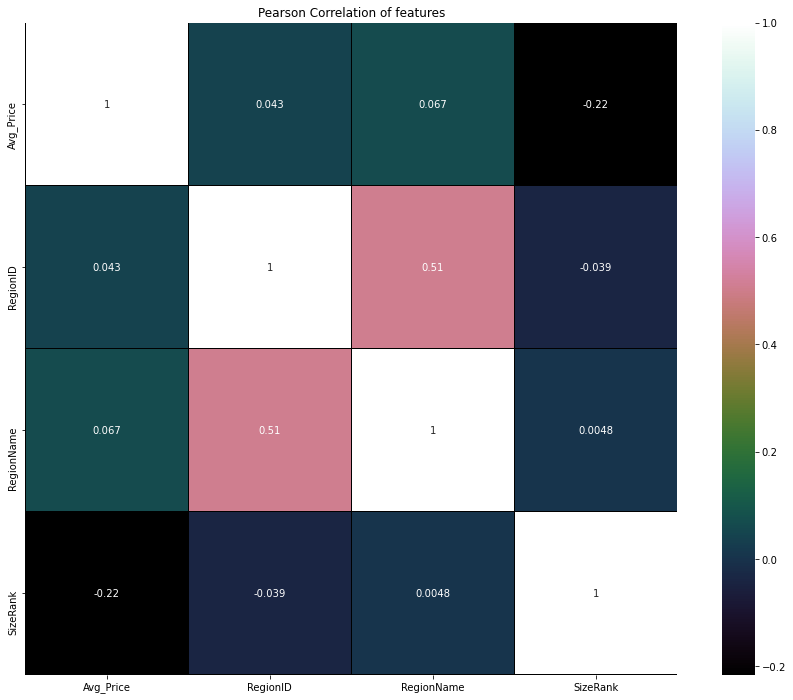

In [30]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in House_Data_without_Price.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = House_Data_without_Price.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = House_Data_without_Price[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

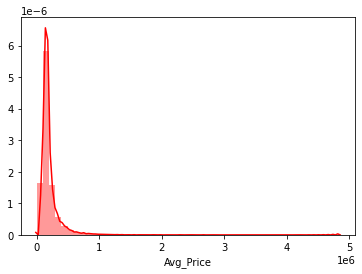

In [31]:
#distribution plot
sns.distplot(House_Data_without_Price['Avg_Price'],color='red')

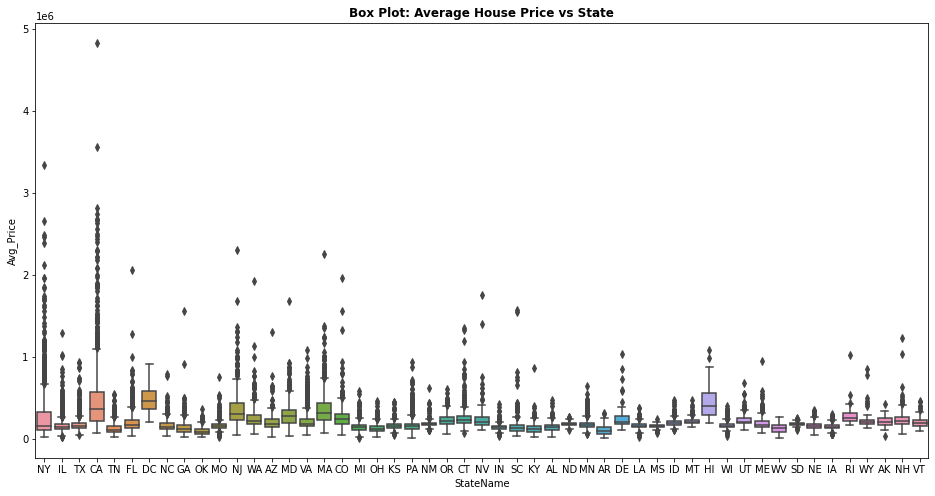

In [32]:
fig = plt.figure(1, figsize=(16, 8))
ax = fig.add_subplot(111)
ax.set_title('Box Plot: Average House Price vs State', fontsize='12',fontweight='bold')
sns.boxplot(x='StateName',y='Avg_Price',data=House_Data_without_Price)

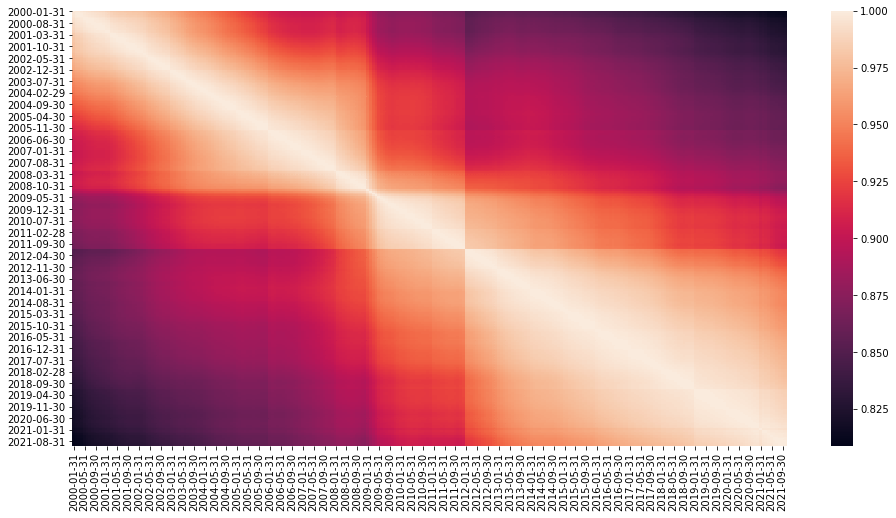

In [33]:
#corr -correlation matrix
fig = plt.figure(1, figsize=(16, 8))
ax = fig.add_subplot(111)
sns.heatmap(House_data_imputed.corr())

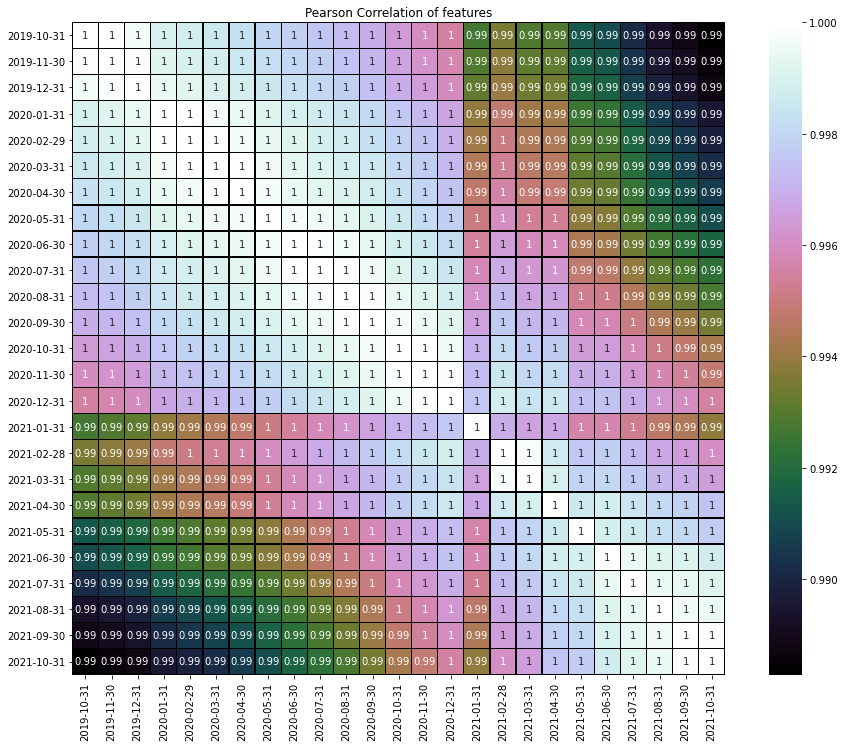

In [34]:
# Get to the numeric columns by inversion  
col=len(House_data_imputed.columns)
num_list = num_list = House_data_imputed.iloc[:,237:col].columns
# Create Dataframe containing only numerical features
house_num = House_data_imputed[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

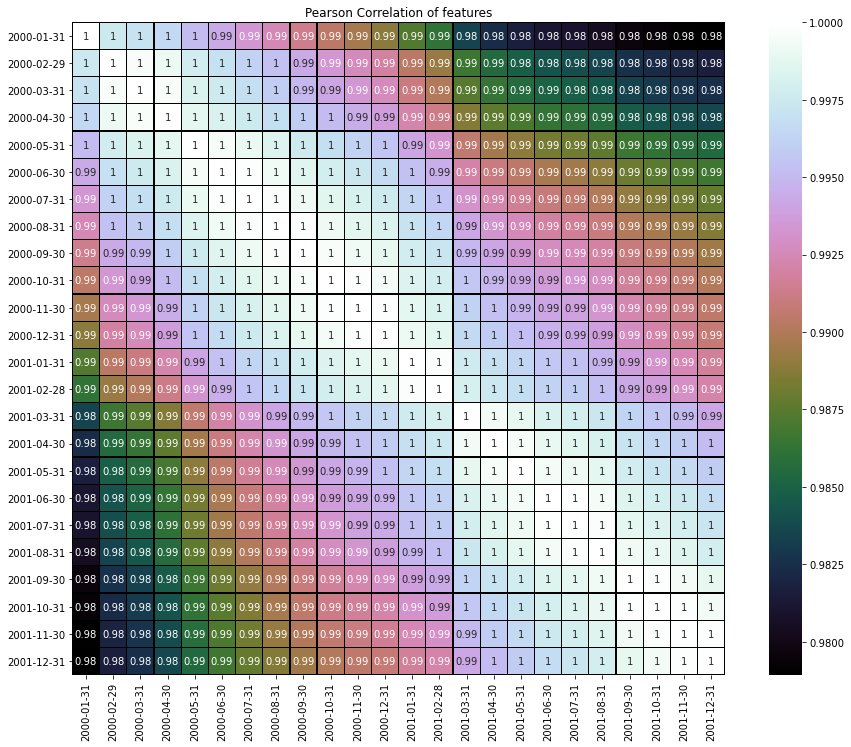

In [35]:
# Get to the numeric columns by inversion            
num_list = House_data_imputed.iloc[:,0:24].columns
# Create Dataframe containing only numerical features
house_num = House_data_imputed[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [36]:
X_data=House_data_imputed.copy()
X_data.columns = pd.to_datetime(X_data.columns)

In [37]:
start_date=X_data.iloc[:,0].name
xtrain=[]
for i in range(0, len(X_data.columns)):
    end_date=X_data.iloc[:,i].name
    num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
    xtrain.append(num_months+1)
print(xtrain)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [38]:
num_list = House_data_imputed.columns

In [39]:
ytrain = House_data_imputed[num_list]

In [40]:
ytrain

2000-01-31     2000-02-29     2000-03-31     2000-04-30  \
0      322869.00000  327712.000000  331597.000000  340071.000000   
1      309242.00000  310679.000000  312629.000000  316377.000000   
2      499124.00000  502962.000000  505658.000000  512326.000000   
3      224324.00000  224642.000000  225365.000000  226591.000000   
4      404572.00000  405709.000000  407859.000000  411613.000000   
...             ...            ...            ...            ...   
30475  147048.75986  147302.413699  147738.225339  148800.186808   
30476  147048.75986  147302.413699  147738.225339  148800.186808   
30477  147048.75986  147302.413699  147738.225339  148800.186808   
30478  147048.75986  147302.413699  147738.225339  148800.186808   
30479  147048.75986  147302.413699  147738.225339  148800.186808   

          2000-05-31     2000-06-30     2000-07-31     2000-08-31  \
0      347722.000000  355041.000000  362744.000000  368966.000000   
1      320207.000000  323952.000000  327820.000000  332176.000000   
2      520244.000000  530961.000000  541356.000000  549908.000000   
3      226154.000000  225818.000000  224700.000000  225041.000000   
4      416152.000000  420501.000000  425083.000000  429949.000000   
...              ...            ...            ...            ...   
30475  149813.760571  150813.526428  151893.035871  153002.060387   
30476  149813.760571  150813.526428  151893.035871  153002.060387   
30477  149813.760571  150813.526428  151893.035871  153002.060387   
30478  149813.760571  150813.526428  151893.035871  153002.060387   
30479  149813.760571  150813.526428  151893.035871  153002.060387   

          2000-09-30     2000-10-31  ...  2021-01-31  2021-02-28  2021-03-31  \
0      374421.000000  379241.000000  ...   1099539.0   1092089.0   1081166.0   
1      335969.000000  339738.000000  ...    499635.0    500978.0    500994.0   
2      555664.000000  562593.000000  ...   1454872.0   1446329.0   1433048.0   
3      224644.000000  225316.000000  ...    357396.0    361965.0    367377.0   
4      434096.000000  439050.000000  ...    641826.0    643433.0    643638.0   
...              ...            ...  ...         ...         ...         ...   
30475  154120.912223  155256.116897  ...   1389886.0   1390519.0   1410412.0   
30476  154120.912223  155256.116897  ...    115875.0    115850.0    116918.0   
30477  154120.912223  155256.116897  ...    158219.0    163050.0    166106.0   
30478  154120.912223  155256.116897  ...    225846.0    229724.0    231437.0   
30479  154120.912223  155256.116897  ...    396638.0    397226.0    392108.0   

       2021-04-30  2021-05-31  2021-06-30  2021-07-31  2021-08-31  2021-09-30  \
0       1088192.0   1095040.0   1099155.0   1107819.0   1116633.0   1126935.0   
1        502925.0    503452.0    506248.0    510021.0    514458.0    517014.0   
2       1450884.0   1445666.0   1444024.0   1445853.0   1460074.0   1475657.0   
3        373918.0    380876.0    389624.0    400359.0    411235.0    420349.0   
4        646220.0    646370.0    648909.0    652645.0    657641.0    660802.0   
...           ...         ...         ...         ...         ...         ...   
30475   1426220.0   1443350.0   1452055.0   1450792.0   1452458.0   1446318.0   
30476    117924.0    119744.0    122206.0    122842.0    123201.0    120815.0   
30477    167607.0    171575.0    176291.0    179015.0    182157.0    184877.0   
30478    233483.0    238097.0    244744.0    250629.0    253216.0    256106.0   
30479    394631.0    398494.0    412669.0    419240.0    424199.0    426673.0   

       2021-10-31  
0       1131304.0  
1        519568.0  
2       1484187.0  
3        428302.0  
4        664683.0  
...           ...  
30475   1446006.0  
30476    121144.0  
30477    190189.0  
30478    262157.0  
30479    430720.0  

[30480 rows x 262 columns]

In [41]:
Y_train=ytrain.T

In [42]:
Y_train.shape

(262, 30480)

In [43]:
Y_train

0         1          2         3         4         5      \
2000-01-31   322869.0  309242.0   499124.0  224324.0  404572.0  106817.0   
2000-02-29   327712.0  310679.0   502962.0  224642.0  405709.0  106830.0   
2000-03-31   331597.0  312629.0   505658.0  225365.0  407859.0  106632.0   
2000-04-30   340071.0  316377.0   512326.0  226591.0  411613.0  106637.0   
2000-05-31   347722.0  320207.0   520244.0  226154.0  416152.0  106669.0   
...               ...       ...        ...       ...       ...       ...   
2021-06-30  1099155.0  506248.0  1444024.0  389624.0  648909.0  223067.0   
2021-07-31  1107819.0  510021.0  1445853.0  400359.0  652645.0  229007.0   
2021-08-31  1116633.0  514458.0  1460074.0  411235.0  657641.0  235340.0   
2021-09-30  1126935.0  517014.0  1475657.0  420349.0  660802.0  240418.0   
2021-10-31  1131304.0  519568.0  1484187.0  428302.0  664683.0  244997.0   

               6         7         8         9      ...          30470  \
2000-01-31  416397.0  105965.0   90215.0  188486.0  ...  147048.759860   
2000-02-29  410935.0  105909.0   90215.0  188865.0  ...  147302.413699   
2000-03-31  411147.0  105653.0   90248.0  190052.0  ...  147738.225339   
2000-04-30  409236.0  105601.0   90214.0  192200.0  ...  148800.186808   
2000-05-31  414335.0  105567.0   90233.0  194583.0  ...  149813.760571   
...              ...       ...       ...       ...  ...            ...   
2021-06-30  867134.0  220385.0  159168.0  330112.0  ...   92917.000000   
2021-07-31  886367.0  225882.0  162203.0  332491.0  ...   93980.000000   
2021-08-31  915491.0  232174.0  164995.0  335100.0  ...   95817.000000   
2021-09-30  924934.0  237152.0  167877.0  337162.0  ...   94021.000000   
2021-10-31  928153.0  241553.0  170179.0  338956.0  ...   94445.000000   

               30471     30472          30473          30474         30475  \
2000-01-31  123484.0  212385.0  147048.759860  147048.759860  1.470488e+05   
2000-02-29  122540.0  212367.0  147302.413699  147302.413699  1.473024e+05   
2000-03-31  120517.0  212854.0  147738.225339  147738.225339  1.477382e+05   
2000-04-30  117262.0  214001.0  148800.186808  148800.186808  1.488002e+05   
2000-05-31  115298.0  215314.0  149813.760571  149813.760571  1.498138e+05   
...              ...       ...            ...            ...           ...   
2021-06-30  204475.0  421122.0  272642.000000   38218.000000  1.452055e+06   
2021-07-31  205877.0  433695.0  279265.000000   39020.000000  1.450792e+06   
2021-08-31  212109.0  442551.0  287721.000000   40312.000000  1.452458e+06   
2021-09-30  212279.0  449794.0  297720.000000   41588.000000  1.446318e+06   
2021-10-31  214375.0  457924.0  306520.000000   43221.000000  1.446006e+06   

                    30476          30477          30478          30479  
2000-01-31  147048.759860  147048.759860  147048.759860  147048.759860  
2000-02-29  147302.413699  147302.413699  147302.413699  147302.413699  
2000-03-31  147738.225339  147738.225339  147738.225339  147738.225339  
2000-04-30  148800.186808  148800.186808  148800.186808  148800.186808  
2000-05-31  149813.760571  149813.760571  149813.760571  149813.760571  
...                   ...            ...            ...            ...  
2021-06-30  122206.000000  176291.000000  244744.000000  412669.000000  
2021-07-31  122842.000000  179015.000000  250629.000000  419240.000000  
2021-08-31  123201.000000  182157.000000  253216.000000  424199.000000  
2021-09-30  120815.000000  184877.000000  256106.000000  426673.000000  
2021-10-31  121144.000000  190189.000000  262157.000000  430720.000000  

[262 rows x 30480 columns]

In [44]:
X_train = pd.DataFrame(xtrain, columns=['Month_number'])

In [45]:
X_train.set_index('Month_number')

Empty DataFrame
Columns: []
Index: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]

[262 rows x 0 columns]

In [46]:
model=LinearRegression()

In [47]:
model.fit(X_train, Y_train)

LinearRegression()

In [48]:
r_sq = model.score(X_train, Y_train)

In [49]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.42075568518265993


In [50]:
Intercept_I=model.intercept_
Intercept_I.shape

(30480,)

In [51]:
Coefficient_s=model.coef_
Coefficient_s.shape

(30480, 1)

In [52]:
from datetime import datetime
def prepare_X_test(DateToPrecict):  
    end_date=datetime.fromisoformat(DateToPrecict).date()
    start_date=X_data.iloc[:,0].name
    num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month) +1
    X_test = np.array(num_months).reshape((-1, 1))
    return X_test

DateToPrecict='2021-10-31'
Growth_Prediction=model.predict(prepare_X_test(DateToPrecict))

In [53]:
T_Predict=Growth_Prediction[0].T

In [54]:
T_Predict=T_Predict+Intercept_I/2

In [55]:
for i in range(0,len(T_Predict)):
    print("Prediction:", T_Predict[i], '\tCoefficient:', Coefficient_s[i],'\tIntercept:', Intercept_I[i] )

Prediction: 1365582.7112059372 	Coefficient: [2428.27857207] 	Intercept: 486249.15021496883
Prediction: 685115.5328340024 	Coefficient: [377.70674659] 	Intercept: 390770.9101517944
Prediction: 1883383.319960459 	Coefficient: [3213.8914987] 	Intercept: 694229.1648679478
Prediction: 463411.0479577208 	Coefficient: [579.22193787] 	Intercept: 207769.9334912696
Prediction: 883980.7807184267 	Coefficient: [529.16549549] 	Intercept: 496892.9472668246
Prediction: 234189.17510378122 	Coefficient: [361.89798563] 	Intercept: 92914.60191278407
Prediction: 1335378.334569233 	Coefficient: [1581.24018728] 	Intercept: 614062.2703342985
Prediction: 232892.21153055085 	Coefficient: [353.09433941] 	Intercept: 93587.66306922874
Prediction: 187733.9152353481 	Coefficient: [197.83246141] 	Intercept: 90601.20689655172
Prediction: 435122.04925217124 	Coefficient: [147.89011784] 	Intercept: 264249.8922523471
Prediction: 970713.8650990806 	Coefficient: [2078.99841763] 	Intercept: 284010.85311924195
Prediction: 

Prediction: 274661.51457724685 	Coefficient: [413.06851479] 	Intercept: 110958.3758006493
Prediction: 606501.2378687807 	Coefficient: [766.38505831] 	Intercept: 270472.2350618584
Prediction: 402858.41118332994 	Coefficient: [667.78538144] 	Intercept: 151932.42749681324
Prediction: 229189.84870059526 	Coefficient: [325.94602609] 	Intercept: 95861.32657716943
Prediction: 191060.8223238321 	Coefficient: [335.52491667] 	Intercept: 68768.86277090463
Prediction: 357898.7523270916 	Coefficient: [383.22314891] 	Intercept: 171662.85820830043
Prediction: 278683.10270346643 	Coefficient: [225.5769052] 	Intercept: 146387.96902693692
Prediction: 542195.8735011648 	Coefficient: [950.16185902] 	Intercept: 195502.31095902435
Prediction: 1240796.7755020915 	Coefficient: [1659.11811026] 	Intercept: 537405.2204088796
Prediction: 256927.40737072763 	Coefficient: [333.15887478] 	Intercept: 113093.18811968062
Prediction: 356851.5831757807 	Coefficient: [747.08607929] 	Intercept: 107410.02026849172
Predictio

Prediction: 398935.8365903108 	Coefficient: [462.63651665] 	Intercept: 185150.0461524963
Prediction: 439417.0728725557 	Coefficient: [667.18026423] 	Intercept: 176410.5624287093
Prediction: 222293.96212993108 	Coefficient: [147.66604907] 	Intercept: 122403.63818172237
Prediction: 109605.039701429 	Coefficient: [-288.35395079] 	Intercept: 123435.84987277354
Prediction: 79107.19008704514 	Coefficient: [-214.38118997] 	Intercept: 90183.37457225585
Prediction: 278115.845307834 	Coefficient: [301.91655932] 	Intercept: 132675.80450995878
Prediction: 1120213.0032206126 	Coefficient: [2210.22784897] 	Intercept: 360755.53786084073
Prediction: 649356.3795355391 	Coefficient: [608.13138839] 	Intercept: 326683.9705185575
Prediction: 1971175.518362347 	Coefficient: [4213.48874479] 	Intercept: 578160.9781521454
Prediction: 430998.0648384556 	Coefficient: [221.97951532] 	Intercept: 248559.62121610952
Prediction: 150405.98933329462 	Coefficient: [-163.84047833] 	Intercept: 128888.12977099237
Predictio

Prediction: 1119471.3097846773 	Coefficient: [1594.70925542] 	Intercept: 467771.656576292
Prediction: 783689.5767465656 	Coefficient: [94.239477] 	Intercept: 505999.2225146968
Prediction: 837883.0846525552 	Coefficient: [1656.47246774] 	Intercept: 269258.1987365097
Prediction: 237774.60132577748 	Coefficient: [238.59341845] 	Intercept: 116842.0837939809
Prediction: 293059.4141117117 	Coefficient: [123.66836613] 	Intercept: 173772.20145652365
Prediction: 798668.2736928635 	Coefficient: [1310.53722229] 	Intercept: 303538.3476353426
Prediction: 782402.7822439098 	Coefficient: [1370.08741477] 	Intercept: 282293.253049048
Prediction: 448177.2969279154 	Coefficient: [359.56926494] 	Intercept: 235980.09967535315
Prediction: 261729.7974221463 	Coefficient: [-163.39193099] 	Intercept: 203025.65556094787
Prediction: 180791.091219389 	Coefficient: [-77.39191255] 	Intercept: 134045.1815390015
Prediction: 269297.4869759269 	Coefficient: [264.55584236] 	Intercept: 133322.5708519786
Prediction: 13660

Prediction: 143840.76439667435 	Coefficient: [23.88919638] 	Intercept: 91721.1966306923
Prediction: 420577.66669235553 	Coefficient: [756.72814839] 	Intercept: 148209.9278757568
Prediction: 1740071.3249265782 	Coefficient: [4026.8040986] 	Intercept: 456699.10072826187
Prediction: 165201.64793616888 	Coefficient: [243.70189273] 	Intercept: 67567.83469334035
Prediction: 493225.8766553869 	Coefficient: [829.40232154] 	Intercept: 183948.31227516016
Prediction: 477574.96131639567 	Coefficient: [587.89407152] 	Intercept: 215697.80971809162
Prediction: 130870.89946029204 	Coefficient: [-199.88626015] 	Intercept: 122160.73307923094
Prediction: 304113.50940027914 	Coefficient: [422.35179126] 	Intercept: 128971.56005966483
Prediction: 361772.4009153233 	Coefficient: [354.22223112] 	Intercept: 179310.78424146707
Prediction: 334622.1889202048 	Coefficient: [375.83639347] 	Intercept: 157435.36921997016
Prediction: 546709.8318417126 	Coefficient: [498.48135474] 	Intercept: 277405.144599456
Predictio

Prediction: 162567.760541514 	Coefficient: [1.00496695] 	Intercept: 108202.97279985962
Prediction: 386819.9564597581 	Coefficient: [395.56297518] 	Intercept: 188788.30464157235
Prediction: 267012.78317504673 	Coefficient: [242.10526051] 	Intercept: 135720.8032815653
Prediction: 738013.5287925146 	Coefficient: [1296.82239639] 	Intercept: 265497.3739580591
Prediction: 190273.70823721407 	Coefficient: [-7.13528525] 	Intercept: 128095.43531441393
Prediction: 303205.7757723249 	Coefficient: [402.41054864] 	Intercept: 131849.47468632096
Prediction: 405830.37283242104 	Coefficient: [196.28672711] 	Intercept: 236268.83355268932
Prediction: 609922.6984063914 	Coefficient: [792.83138215] 	Intercept: 268133.9175221549
Prediction: 123183.50276989045 	Coefficient: [38.47459257] 	Intercept: 75402.10634377469
Prediction: 676815.5295903698 	Coefficient: [656.14988669] 	Intercept: 336602.8395191717
Prediction: 329324.4057286438 	Coefficient: [301.49095469] 	Intercept: 166889.1837325612
Prediction: 2445

Prediction: 137856.4820770325 	Coefficient: [172.86143442] 	Intercept: 61711.19083969467
Prediction: 770073.925977285 	Coefficient: [519.00457461] 	Intercept: 422729.81828551367
Prediction: 106841.17737112906 	Coefficient: [-266.17127812] 	Intercept: 117718.7014919711
Prediction: 184011.55706708223 	Coefficient: [-1.20451817] 	Intercept: 122884.7605510222
Prediction: 318871.4981528296 	Coefficient: [198.9016976] 	Intercept: 177839.5022544975
Prediction: 263864.7225252059 	Coefficient: [359.52876899] 	Intercept: 113112.123365798
Prediction: 189319.54093744923 	Coefficient: [78.49950026] 	Intercept: 112501.78124614293
Prediction: 396509.19544617005 	Coefficient: [192.09765728] 	Intercept: 230786.40615951567
Prediction: 307504.72679522424 	Coefficient: [373.22635034] 	Intercept: 139812.9486707028
Prediction: 390329.488900421 	Coefficient: [544.98977818] 	Intercept: 165028.11134509082
Prediction: 349437.56927520595 	Coefficient: [400.26918541] 	Intercept: 163044.69513186262
Prediction: 500

Prediction: 1859929.2944299262 	Coefficient: [3638.78001949] 	Intercept: 604379.2862156706
Prediction: 217675.9926466251 	Coefficient: [-408.26680801] 	Intercept: 216427.93089656252
Prediction: 741946.2009836155 	Coefficient: [400.68455644] 	Intercept: 424644.56479775376
Prediction: 317149.94013633765 	Coefficient: [357.26781312] 	Intercept: 149030.51539878914
Prediction: 1349525.7197501445 	Coefficient: [3089.69035778] 	Intercept: 360017.89734140574
Prediction: 198523.5839137509 	Coefficient: [101.23257304] 	Intercept: 114667.09985083794
Prediction: 510006.2140572314 	Coefficient: [240.01718783] 	Intercept: 298081.14056330617
Prediction: 332381.7210115663 	Coefficient: [576.58810487] 	Intercept: 120877.09169079585
Prediction: 217657.78031591265 	Coefficient: [447.82760723] 	Intercept: 66884.63148196897
Prediction: 727740.4402283881 	Coefficient: [2410.88089846] 	Intercept: 64059.763220858586
Prediction: 227026.00993157097 	Coefficient: [-45.87700185] 	Intercept: 159363.8562779679
Pred

Prediction: 933308.9515890547 	Coefficient: [1730.65299987] 	Intercept: 319918.5770816881
Prediction: 426406.5874589771 	Coefficient: [335.19221989] 	Intercept: 225724.1505659384
Prediction: 98195.07037423295 	Coefficient: [31.66968894] 	Intercept: 59931.74124769676
Prediction: 543901.9185956924 	Coefficient: [1100.4135176] 	Intercept: 170395.71798936906
Prediction: 203254.27960329765 	Coefficient: [304.62431879] 	Intercept: 82295.13872071597
Prediction: 421244.0090332667 	Coefficient: [728.72035892] 	Intercept: 153546.18333141378
Prediction: 62359.802989146294 	Coefficient: [-212.02774127] 	Intercept: 78607.38080196542
Prediction: 201385.82149489422 	Coefficient: [184.0981265] 	Intercept: 102101.40823388782
Prediction: 979699.6333080449 	Coefficient: [1439.06569169] 	Intercept: 401776.2813898394
Prediction: 558526.3958424453 	Coefficient: [919.51461645] 	Intercept: 211742.3775554971
Prediction: 535369.276825734 	Coefficient: [608.6049414] 	Intercept: 250609.8547863473
Prediction: 6448

Prediction: 147705.26848448234 	Coefficient: [-154.90495374] 	Intercept: 125526.91090939718
Prediction: 147857.98298314778 	Coefficient: [145.57343521] 	Intercept: 73145.1619724489
Prediction: 425459.5833666121 	Coefficient: [550.35850406] 	Intercept: 187510.4368693516
Prediction: 244021.60882408186 	Coefficient: [510.43767938] 	Intercept: 73524.62455032027
Prediction: 204348.69095562803 	Coefficient: [226.21937165] 	Intercept: 96719.47705536545
Prediction: 146520.7601161469 	Coefficient: [259.30178611] 	Intercept: 52389.12810388701
Prediction: 135704.3367414412 	Coefficient: [197.62794225] 	Intercept: 55950.54391506536
Prediction: 332171.5223286029 	Coefficient: [272.53000973] 	Intercept: 173845.7731859261
Prediction: 193505.9539509263 	Coefficient: [361.29234196] 	Intercept: 65898.24023865929
Prediction: 291857.3168964817 	Coefficient: [377.02266656] 	Intercept: 128718.25217162412
Prediction: 237518.05395284094 	Coefficient: [270.1979868] 	Intercept: 111150.78760700974
Prediction: 33

Prediction: 161139.45001936672 	Coefficient: [128.07854078] 	Intercept: 85055.24822321664
Prediction: 302652.06877952337 	Coefficient: [358.18633147] 	Intercept: 139204.83328946214
Prediction: 488796.7807622978 	Coefficient: [424.11960622] 	Intercept: 251784.96262174254
Prediction: 305901.675481251 	Coefficient: [317.53302015] 	Intercept: 148472.01613444847
Prediction: 271873.8372791897 	Coefficient: [-63.86572719] 	Intercept: 192404.43853521452
Prediction: 363194.311739698 	Coefficient: [555.65632207] 	Intercept: 145074.9035711152
Prediction: 298296.7356882323 	Coefficient: [427.95642373] 	Intercept: 124114.76844783718
Prediction: 295475.7667216809 	Coefficient: [114.89792691] 	Intercept: 176915.00658067915
Prediction: 247035.21690185298 	Coefficient: [242.97806173] 	Intercept: 122249.97648503994
Prediction: 231706.76784600242 	Coefficient: [14.44496311] 	Intercept: 151948.12500672168
Prediction: 208349.5074467599 	Coefficient: [167.65834248] 	Intercept: 109615.34781082741
Prediction:

Prediction: 597451.6982709413 	Coefficient: [1179.13940564] 	Intercept: 192344.7826621041
Prediction: 288023.54355130164 	Coefficient: [405.56177837] 	Intercept: 121177.57174492683
Prediction: 431458.46453506046 	Coefficient: [597.03879915] 	Intercept: 183356.1994384487
Prediction: 284647.9276607379 	Coefficient: [436.30823467] 	Intercept: 113556.78011757482
Prediction: 277417.64485124673 	Coefficient: [-6.38057145] 	Intercept: 186059.56971405313
Prediction: 50384.59631378547 	Coefficient: [-62.66997352] 	Intercept: 44536.08625076775
Prediction: 617353.575946375 	Coefficient: [892.83977706] 	Intercept: 255619.70290427312
Prediction: 344983.050543534 	Coefficient: [385.62645684] 	Intercept: 162632.6125675019
Prediction: 156852.08853632177 	Coefficient: [-137.85033563] 	Intercept: 128645.91764778618
Prediction: 895351.408974445 	Coefficient: [883.30897765] 	Intercept: 442616.30455383
Prediction: 227699.35660725203 	Coefficient: [85.39266887] 	Intercept: 136884.31824164253
Prediction: 226

Prediction: 334563.8866433399 	Coefficient: [303.47586434] 	Intercept: 170035.47345792752
Prediction: 97374.89789138027 	Coefficient: [90.53130051] 	Intercept: 49103.79810476441
Prediction: 325738.64676565875 	Coefficient: [282.30545861] 	Intercept: 167849.74440642275
Prediction: 113133.66959352588 	Coefficient: [37.15290362] 	Intercept: 68933.07256295516
Prediction: 4738760.691643388 	Coefficient: [11239.21030449] 	Intercept: 1196058.3945775204
Prediction: 382498.0697611502 	Coefficient: [862.40872934] 	Intercept: 104364.65511600331
Prediction: 673353.733421276 	Coefficient: [83.52015423] 	Intercept: 434314.30200930074
Prediction: 367402.970592955 	Coefficient: [312.73231132] 	Intercept: 190311.40335175925
Prediction: 605771.7476206967 	Coefficient: [768.53758594] 	Intercept: 269609.93340352725
Prediction: 218304.57707326242 	Coefficient: [48.84600064] 	Intercept: 137004.61660365175
Prediction: 190139.03919349067 	Coefficient: [193.37556478] 	Intercept: 92983.0941475827
Prediction: 43

Prediction: 240366.23805441946 	Coefficient: [23.96382402] 	Intercept: 156058.47744127602
Prediction: 1432362.8342843205 	Coefficient: [1765.15580079] 	Intercept: 646594.6763183293
Prediction: 538705.9983856068 	Coefficient: [991.33222771] 	Intercept: 185984.6364832851
Prediction: 973739.1508952226 	Coefficient: [1275.2010395] 	Intercept: 426424.3190313241
Prediction: 230700.9839821766 	Coefficient: [232.83991885] 	Intercept: 113131.28349565675
Prediction: 2031165.394582191 	Coefficient: [3376.33999708] 	Intercept: 764376.2102307626
Prediction: 90831.73566487878 	Coefficient: [98.00531959] 	Intercept: 43436.22795472492
Prediction: 312734.4799987389 	Coefficient: [541.33718999] 	Intercept: 113936.09081337196
Prediction: 217036.80651688157 	Coefficient: [-315.15888465] 	Intercept: 199738.956196231
Prediction: 308545.9782654097 	Coefficient: [-137.54573931] 	Intercept: 229721.97464244976
Prediction: 525904.9839956881 	Coefficient: [1793.25988428] 	Intercept: 37380.59620952894
Prediction: 

Prediction: 179655.8268596617 	Coefficient: [-606.36719415] 	Intercept: 225682.6878187016
Prediction: 236828.26538352596 	Coefficient: [301.10194998] 	Intercept: 105293.03632534877
Prediction: 1536544.2771091452 	Coefficient: [2572.54258025] 	Intercept: 575025.4140563307
Prediction: 592970.3066728254 	Coefficient: [576.08531629] 	Intercept: 294690.63586908835
Prediction: 186822.66947589535 	Coefficient: [-569.62798404] 	Intercept: 224043.46752900962
Prediction: 243736.3240212971 	Coefficient: [-90.26488293] 	Intercept: 178257.14889883305
Prediction: 292141.88988996187 	Coefficient: [222.88284959] 	Intercept: 155831.05553207465
Prediction: 379576.7524767207 	Coefficient: [279.0449261] 	Intercept: 204311.32122488372
Prediction: 182405.55239143333 	Coefficient: [-39.96350624] 	Intercept: 128583.99401799953
Prediction: 183335.19051154278 	Coefficient: [-488.97406226] 	Intercept: 207630.92988257942
Prediction: 191127.97882138952 	Coefficient: [158.78708192] 	Intercept: 99683.84223918576
Pre

Prediction: 174672.90444670417 	Coefficient: [109.18562086] 	Intercept: 97377.51452136527
Prediction: 186219.3042573026 	Coefficient: [-449.57466151] 	Intercept: 202671.91038233385
Prediction: 363499.79090188164 	Coefficient: [431.87725641] 	Intercept: 166898.63314907433
Prediction: 388871.1232088292 	Coefficient: [507.19963929] 	Intercept: 170656.54514345882
Prediction: 500851.43043913564 	Coefficient: [1191.88666186] 	Intercept: 125718.08335526896
Prediction: 239587.93408729474 	Coefficient: [-217.80119293] 	Intercept: 197767.89775719328
Prediction: 309415.51268861693 	Coefficient: [353.22333841] 	Intercept: 144580.66535053085
Prediction: 211816.36362063797 	Coefficient: [131.16568532] 	Intercept: 118300.63604457316
Prediction: 275882.27183885395 	Coefficient: [7.01807036] 	Intercept: 182695.69160257155
Prediction: 215744.16794910675 	Coefficient: [318.42040748] 	Intercept: 88212.0141265245
Prediction: 443381.5118333789 	Coefficient: [493.13245898] 	Intercept: 209453.8717206283
Predi

Prediction: 847481.4488231677 	Coefficient: [590.78856386] 	Intercept: 461796.5633938756
Prediction: 486180.72620705003 	Coefficient: [1160.14779488] 	Intercept: 121481.33596560502
Prediction: 47421.37079311645 	Coefficient: [-97.26657854] 	Intercept: 48603.47624683405
Prediction: 613265.5806274147 	Coefficient: [503.02488281] 	Intercept: 320982.04088795296
Prediction: 2216605.436405451 	Coefficient: [4254.90337695] 	Intercept: 734547.1677634468
Prediction: 512914.37820005335 	Coefficient: [190.28162271] 	Intercept: 308707.06203386857
Prediction: 859216.0501684621 	Coefficient: [587.62557954] 	Intercept: 470172.0988856717
Prediction: 108850.78307212457 	Coefficient: [122.39179846] 	Intercept: 51189.42125120646
Prediction: 263214.78141019034 	Coefficient: [-8.97387312] 	Intercept: 177043.95744494165
Prediction: 263872.370752793 	Coefficient: [-13.61901988] 	Intercept: 178293.70264104588
Prediction: 116596.24188533735 	Coefficient: [-799.10850854] 	Intercept: 217308.44741550475
Predictio

Prediction: 181639.63503516663 	Coefficient: [-659.28379072] 	Intercept: 236247.99213657045
Prediction: 230110.4769966984 	Coefficient: [152.90125568] 	Intercept: 126700.23200639914
Prediction: 451512.4162605662 	Coefficient: [289.84547498] 	Intercept: 250381.93454417834
Prediction: 433550.8005673896 	Coefficient: [373.41146209] 	Intercept: 223811.33166622792
Prediction: 641972.6853464539 	Coefficient: [1122.40151851] 	Intercept: 231935.65833113974
Prediction: 258511.2790582458 	Coefficient: [-234.99689459] 	Intercept: 213386.97696074675
Prediction: 454540.3880590616 	Coefficient: [219.48484609] 	Intercept: 264690.23892252345
Prediction: 552689.6743536126 	Coefficient: [1352.9744793] 	Intercept: 132140.24051778368
Prediction: 358568.5258801679 	Coefficient: [26.11095409] 	Intercept: 234484.9706062999
Prediction: 323565.777210422 	Coefficient: [203.14731137] 	Intercept: 180227.45442133275
Prediction: 92070.87059151867 	Coefficient: [-260.33508381] 	Intercept: 106852.44169974132
Predicti

Prediction: 744446.4821320799 	Coefficient: [1857.56788108] 	Intercept: 171842.46485917346
Prediction: 115218.58840179074 	Coefficient: [8.69325128] 	Intercept: 75293.97104501184
Prediction: 636460.7565939405 	Coefficient: [543.51847845] 	Intercept: 329372.6101605686
Prediction: 231943.5618418788 	Coefficient: [-210.01779216] 	Intercept: 191312.14892497848
Prediction: 483373.6889765868 	Coefficient: [809.02357935] 	Intercept: 180939.6741247697
Prediction: 293151.1469097831 	Coefficient: [457.72911022] 	Intercept: 115484.0800210582
Prediction: 120105.2967240893 	Coefficient: [34.50273473] 	Intercept: 74043.72014950727
Prediction: 362167.98338933167 	Coefficient: [370.2352647] 	Intercept: 176777.5626919365
Prediction: 181158.29922156152 	Coefficient: [-10.79189507] 	Intercept: 122657.18382030359
Prediction: 505079.74599829654 	Coefficient: [393.19148525] 	Intercept: 268042.3845748881
Prediction: 115208.98144648831 	Coefficient: [111.28849297] 	Intercept: 57367.59752566464
Prediction: 680

Prediction: 353156.94964787946 	Coefficient: [346.49608345] 	Intercept: 174916.6505220672
Prediction: 116883.99209367683 	Coefficient: [246.38155728] 	Intercept: 34888.01605685707
Prediction: 552132.0545999531 	Coefficient: [496.11855965] 	Intercept: 281432.661314381
Prediction: 287633.5959136502 	Coefficient: [-49.9621206] 	Intercept: 200482.44767321413
Prediction: 145121.49173286546 	Coefficient: [152.69081517] 	Intercept: 70077.66543827322
Prediction: 191933.06055642685 	Coefficient: [335.90184596] 	Intercept: 69284.51794331841
Prediction: 1067080.3832345647 	Coefficient: [1119.05920643] 	Intercept: 515924.58076686854
Prediction: 236312.45605324057 	Coefficient: [-132.31636736] 	Intercept: 180652.89620075456
Prediction: 732981.6201855534 	Coefficient: [384.09640653] 	Intercept: 421565.57444941654
Prediction: 628212.1278491453 	Coefficient: [1458.72736352] 	Intercept: 164017.03907125356
Prediction: 280116.359881411 	Coefficient: [257.73746877] 	Intercept: 141726.09537597615
Predictio

Prediction: 186182.3692756849 	Coefficient: [103.288529] 	Intercept: 106080.51645169781
Prediction: 229920.17851314717 	Coefficient: [-244.78993761] 	Intercept: 196036.76144551267
Prediction: 693848.3195817991 	Coefficient: [271.17449559] 	Intercept: 415200.40115819953
Prediction: 678616.3978778686 	Coefficient: [580.39377783] 	Intercept: 351035.48539089237
Prediction: 62957.83309234491 	Coefficient: [-396.82813275] 	Intercept: 111284.53591498997
Prediction: 183338.6912440436 	Coefficient: [150.12962987] 	Intercept: 96003.1521453014
Prediction: 255662.30496827798 	Coefficient: [-71.52997527] 	Intercept: 182935.4389922355
Prediction: 211781.72521876224 	Coefficient: [-319.70494066] 	Intercept: 197029.61311365798
Prediction: 187088.69391582807 	Coefficient: [-463.42667456] 	Intercept: 205670.98843390192
Prediction: 380526.46414372267 	Coefficient: [305.17080407] 	Intercept: 200381.14231815393
Prediction: 452818.813091865 	Coefficient: [538.16799965] 	Intercept: 207879.1981223129
Predicti

Prediction: 211029.55866412717 	Coefficient: [356.39685048] 	Intercept: 78435.72255856806
Prediction: 363280.06560656533 	Coefficient: [364.47827866] 	Intercept: 178524.50439891196
Prediction: 310436.18783273734 	Coefficient: [151.84431456] 	Intercept: 180435.31827920707
Prediction: 99418.33748748353 	Coefficient: [-881.62825614] 	Intercept: 220269.96039803108
Prediction: 179636.53464679865 	Coefficient: [-477.26522418] 	Intercept: 203120.01558799337
Prediction: 249565.2129408094 	Coefficient: [-283.21590777] 	Intercept: 215845.18718358997
Prediction: 130750.22557300283 	Coefficient: [202.92455422] 	Intercept: 51722.661577608145
Prediction: 249023.46971086046 	Coefficient: [323.59728045] 	Intercept: 109493.98815477759
Prediction: 185508.46951163444 	Coefficient: [-559.77725796] 	Intercept: 221446.74073100713
Prediction: 151171.58461375945 	Coefficient: [156.08943533] 	Intercept: 73517.43503813834
Prediction: 237259.70541537268 	Coefficient: [-379.99149254] 	Intercept: 224544.9843067582

Prediction: 235268.83614592726 	Coefficient: [229.32898525] 	Intercept: 116789.76134070368
Prediction: 282857.0971244851 	Coefficient: [250.7722271] 	Intercept: 144769.84908309206
Prediction: 329069.84273444646 	Coefficient: [298.70982324] 	Intercept: 167205.24602965693
Prediction: 156468.12886270852 	Coefficient: [-2.60675163] 	Intercept: 104767.39852592787
Prediction: 205979.975124032 	Coefficient: [293.76362301] 	Intercept: 86009.27059752567
Prediction: 340250.83822472463 	Coefficient: [317.03292838] 	Intercept: 171458.8073260304
Prediction: 273123.7838606384 	Coefficient: [81.85793106] 	Intercept: 167784.67061507414
Prediction: 207467.2894593537 	Coefficient: [107.44270194] 	Intercept: 119544.86770000274
Prediction: 149983.58786935546 	Coefficient: [-676.27396529] 	Intercept: 218111.57785105248
Prediction: 152593.0595208106 	Coefficient: [128.91656281] 	Intercept: 79211.28004225846
Prediction: 200740.57146264223 	Coefficient: [-475.65787982] 	Intercept: 216908.6239830495
Prediction

Prediction: 1362528.0591785712 	Coefficient: [1346.91647292] 	Intercept: 673090.6288496973
Prediction: 181170.94903819732 	Coefficient: [-482.10279822] 	Intercept: 204987.92144763807
Prediction: 295676.4317923215 	Coefficient: [142.76978577] 	Intercept: 172180.4986138113
Prediction: 164388.0746927932 	Coefficient: [194.68717436] 	Intercept: 75586.69000614196
Prediction: 230351.3874868658 	Coefficient: [-296.46260554] 	Intercept: 205349.7267589504
Prediction: 258471.98846159538 	Coefficient: [-227.21307602] 	Intercept: 212001.2095864622
Prediction: 97909.04119204874 	Coefficient: [120.60884744] 	Intercept: 44206.34877599368
Prediction: 416443.91401605285 	Coefficient: [747.88760677] 	Intercept: 146998.24069443785
Prediction: 374434.98784400936 	Coefficient: [388.50952372] 	Intercept: 181763.66175309292
Prediction: 1684137.1977613347 	Coefficient: [2581.78135598] 	Intercept: 671806.9883302624
Prediction: 417377.646467426 	Coefficient: [549.42079699] 	Intercept: 182286.26510316163
Predict

Prediction: 196616.04412908343 	Coefficient: [233.85136973] 	Intercept: 90231.32350618584
Prediction: 120080.58565542064 	Coefficient: [140.08004608] 	Intercept: 55586.40905501449
Prediction: 230188.8834376764 	Coefficient: [-419.952426] 	Intercept: 226810.94603230804
Prediction: 342251.76252522593 	Coefficient: [428.49021672] 	Intercept: 153324.88382907782
Prediction: 348823.2625602562 	Coefficient: [444.73366682] 	Intercept: 154868.69456874617
Prediction: 146848.9476436009 	Coefficient: [-655.67412617] 	Intercept: 212423.71246695094
Prediction: 251865.08754171414 	Coefficient: [-176.09519706] 	Intercept: 198668.01944800944
Prediction: 192795.84091534765 	Coefficient: [-534.7540168] 	Intercept: 221934.26221182093
Prediction: 330540.3098330172 	Coefficient: [248.44294161] 	Intercept: 176965.50608684373
Prediction: 272917.07074647787 	Coefficient: [13.5921995] 	Intercept: 179570.60965118083
Prediction: 134859.61336833687 	Coefficient: [222.2668633] 	Intercept: 51083.79678862859
Predicti

Prediction: 177899.5167376515 	Coefficient: [-216.33571194] 	Intercept: 156386.31551104464
Prediction: 156611.75011677312 	Coefficient: [23.66916405] 	Intercept: 100273.61942434435
Prediction: 155558.61283754546 	Coefficient: [201.63108629] 	Intercept: 68487.51215232079
Prediction: 257726.95761903303 	Coefficient: [276.21387346] 	Intercept: 123572.61518080626
Prediction: 287529.2847023362 	Coefficient: [113.71469009] 	Intercept: 171824.02393271145
Prediction: 1216924.580531165 	Coefficient: [-309.51389082] 	Intercept: 865344.8132841976
Prediction: 123706.61568712429 	Coefficient: [-125.72194774] 	Intercept: 104430.51066401783
Prediction: 387220.3417125646 	Coefficient: [622.05514626] 	Intercept: 149494.5955953321
Prediction: 287478.92960408167 	Coefficient: [205.98585613] 	Intercept: 155673.75686584192
Prediction: 162704.4549732796 	Coefficient: [-699.41440272] 	Intercept: 230634.01898992038
Prediction: 251612.5361478623 	Coefficient: [288.19514107] 	Intercept: 117403.60612441871
Predi

Prediction: 148475.55700035798 	Coefficient: [218.97989532] 	Intercept: 60735.21628498729
Prediction: 175619.03849572182 	Coefficient: [175.1874848] 	Intercept: 86479.94498552251
Prediction: 226721.1912425423 	Coefficient: [96.76914177] 	Intercept: 134245.1173993156
Prediction: 169402.6310289158 	Coefficient: [91.66804255] 	Intercept: 96923.73592096797
Prediction: 175704.43232664632 	Coefficient: [-571.89330336] 	Intercept: 217026.9852043654
Prediction: 324436.3801863047 	Coefficient: [327.23091284] 	Intercept: 159134.58734843222
Prediction: 227870.85449426185 	Coefficient: [272.47607519] 	Intercept: 104321.41519698166
Prediction: 294337.1252325268 	Coefficient: [62.02053199] 	Intercept: 185391.83056820568
Prediction: 513821.17357863166 	Coefficient: [360.84243435] 	Intercept: 279520.30385189084
Prediction: 398048.8573432205 	Coefficient: [424.78370267] 	Intercept: 191170.35149600776
Prediction: 188674.10144287854 	Coefficient: [269.0550018] 	Intercept: 78787.79398087217
Prediction: 89

Prediction: 702293.5913353222 	Coefficient: [1771.54501635] 	Intercept: 158765.86470123718
Prediction: 212524.83245693002 	Coefficient: [-331.69731022] 	Intercept: 199619.68515589982
Prediction: 244538.42040163995 	Coefficient: [82.34449263] 	Intercept: 148642.7755549706
Prediction: 397641.7489770339 	Coefficient: [145.98191706] 	Intercept: 239596.3244713521
Prediction: 527604.3727973909 	Coefficient: [849.88297167] 	Intercept: 203290.022813021
Prediction: 259407.86199248763 	Coefficient: [-69.25631243] 	Intercept: 185035.34389908207
Prediction: 4025821.221643779 	Coefficient: [4150.86693216] 	Intercept: 1958862.7236114768
Prediction: 152623.4516677893 	Coefficient: [240.46699502] 	Intercept: 59747.39931560938
Prediction: 156055.60373280587 	Coefficient: [-621.44182369] 	Intercept: 212582.24102709835
Prediction: 478067.8217411626 	Coefficient: [478.62311275] 	Intercept: 235112.37746775465
Prediction: 274070.6344054919 	Coefficient: [293.28478377] 	Intercept: 131486.6807054488
Predictio

Prediction: 367633.07270938624 	Coefficient: [492.40680939] 	Intercept: 159081.6590998607
Prediction: 337840.47182043805 	Coefficient: [389.84493795] 	Intercept: 157134.0653851459
Prediction: 169123.78612104023 	Coefficient: [-537.56818841] 	Intercept: 206644.4343235799
Prediction: 221074.47828526018 	Coefficient: [218.80850074] 	Intercept: 109164.43406159517
Prediction: 52813.33072374793 	Coefficient: [67.98444691] 	Intercept: 23334.27042204089
Prediction: 277503.3802082864 	Coefficient: [424.18919594] 	Intercept: 110910.5405808546
Prediction: 139846.62662744615 	Coefficient: [152.24667255] 	Intercept: 66638.66561375801
Prediction: 139076.7100479488 	Coefficient: [-692.03201013] 	Intercept: 213592.7311343978
Prediction: 263754.9912486143 	Coefficient: [411.00116167] 	Intercept: 104048.45792752481
Prediction: 366281.5159087292 	Coefficient: [503.88827658] 	Intercept: 156175.19162937615
Prediction: 332033.84232325066 	Coefficient: [276.53449147] 	Intercept: 173054.53703808886
Prediction

Prediction: 184115.60405896953 	Coefficient: [284.56142317] 	Intercept: 73040.34079143635
Prediction: 219376.66863718853 	Coefficient: [-379.47262049] 	Intercept: 212532.33013701485
Prediction: 246817.38976496411 	Coefficient: [-245.7932899] 	Intercept: 207476.82114595154
Prediction: 123333.43434467279 	Coefficient: [73.95123925] 	Intercept: 69305.47310695797
Prediction: 161115.09342279052 	Coefficient: [198.60048789] 	Intercept: 72721.17706413969
Prediction: 187549.88728522716 	Coefficient: [186.03966923] 	Intercept: 92538.32929718347
Prediction: 211109.18508577748 	Coefficient: [-465.54942595] 	Intercept: 222055.42312248333
Prediction: 1354158.1116288356 	Coefficient: [1583.29887393] 	Intercept: 626222.5377730981
Prediction: 282629.1996725878 	Coefficient: [158.17286625] 	Intercept: 160791.93914367937
Prediction: 706123.7062116273 	Coefficient: [371.80291358] 	Intercept: 405807.561902255
Prediction: 586607.6384821768 	Coefficient: [294.99462303] 	Intercept: 339546.03149951744
Predict

Prediction: 311534.7969731211 	Coefficient: [228.87434389] 	Intercept: 167713.1459155918
Prediction: 251080.21786162944 	Coefficient: [-281.69532721] 	Intercept: 216589.59572699163
Prediction: 309812.0531126206 	Coefficient: [152.09932031] 	Intercept: 179974.68746037027
Prediction: 181771.01023192046 	Coefficient: [-485.65298042] 	Intercept: 206008.0607347993
Prediction: 151252.82584823295 	Coefficient: [-647.56221827] 	Intercept: 213942.75135672724
Prediction: 319366.35225833225 	Coefficient: [241.8105038] 	Intercept: 170674.66684215143
Prediction: 205039.6885293378 	Coefficient: [-444.38671509] 	Intercept: 214312.6719220009
Prediction: 617003.910118599 	Coefficient: [480.59058334] 	Intercept: 327392.7848556638
Prediction: 376886.0717723216 	Coefficient: [296.1800904] 	Intercept: 199524.5920578096
Prediction: 125078.68445230929 	Coefficient: [65.04058168] 	Intercept: 72025.3680343988
Prediction: 231888.2055021328 	Coefficient: [-183.51213737] 	Intercept: 186645.59032954636
Prediction:

Prediction: 177210.43328978834 	Coefficient: [-546.42990375] 	Intercept: 213583.37871480396
Prediction: 231477.89979961736 	Coefficient: [-272.80314301] 	Intercept: 201968.21551237235
Prediction: 174751.65350875253 	Coefficient: [97.7165009] 	Intercept: 99433.28684878905
Prediction: 194046.0872961409 	Coefficient: [-530.11512077] 	Intercept: 221957.4992917542
Prediction: 295513.93283489725 	Coefficient: [8.97089521] 	Intercept: 195442.37219312505
Prediction: 398963.47649354726 	Coefficient: [593.86078819] 	Intercept: 162247.96665789245
Prediction: 209530.0367226917 	Coefficient: [173.74111358] 	Intercept: 109339.90997630956
Prediction: 230799.11428863113 	Coefficient: [46.82622203] 	Intercept: 145687.09607791525
Prediction: 140382.30482689894 	Coefficient: [187.08944352] 	Intercept: 60909.91374923226
Prediction: 206507.81091481948 	Coefficient: [179.24462611] 	Intercept: 106363.81258225848
Prediction: 400357.8769930117 	Coefficient: [402.44155573] 	Intercept: 196612.12626129686
Predict

Prediction: 583123.2013682809 	Coefficient: [1142.85877913] 	Intercept: 189129.46749144513
Prediction: 360277.30891375925 	Coefficient: [397.5708353] 	Intercept: 170742.50004387123
Prediction: 665257.0898717287 	Coefficient: [1189.71558538] 	Intercept: 235701.07100101904
Prediction: 579629.5896135031 	Coefficient: [874.60140168] 	Intercept: 233656.014916206
Prediction: 121440.24130691453 	Coefficient: [149.30927657] 	Intercept: 54880.807229972794
Prediction: 290144.5252244354 	Coefficient: [159.45165545] 	Intercept: 165578.79433184172
Prediction: 215652.813880163 	Coefficient: [-276.93520348] 	Intercept: 192139.89146142316
Prediction: 99828.25738011904 	Coefficient: [67.5994243] 	Intercept: 54744.80547512504
Prediction: 418645.6153940851 	Coefficient: [640.93738296] 	Intercept: 167146.68070544885
Prediction: 217142.89184510644 	Coefficient: [224.32061651] 	Intercept: 105580.59354581201
Prediction: 277247.2893296042 	Coefficient: [-5.54445447] 	Intercept: 185799.95759993963
Prediction: 

Prediction: 189161.75548119537 	Coefficient: [-494.76089943] 	Intercept: 212526.07408740476
Prediction: 148791.31630050752 	Coefficient: [-340.92473694] 	Intercept: 158742.39825211684
Prediction: 193282.78360391685 	Coefficient: [161.27553445] 	Intercept: 100685.7290515048
Prediction: 186888.06423819455 	Coefficient: [-452.18667433] 	Intercept: 203573.98194213456
Prediction: 183705.27753164113 	Coefficient: [-651.90312321] 	Intercept: 236335.93054141384
Prediction: 190020.4847205807 	Coefficient: [-597.38502208] 	Intercept: 231023.57367085616
Prediction: 156376.5497878874 	Coefficient: [-735.52019216] 	Intercept: 232721.8934223003
Prediction: 486853.6077922817 	Coefficient: [976.3000427] 	Intercept: 154041.99773576445
Prediction: 133883.81952141365 	Coefficient: [155.69013025] 	Intercept: 62062.00359743793
Prediction: 206715.23015879752 	Coefficient: [-480.6754462] 	Intercept: 221768.1313761075
Prediction: 190662.72517916295 	Coefficient: [90.50918076] 	Intercept: 111299.54654733701
Pr

Prediction: 214426.91815591 	Coefficient: [-517.81148875] 	Intercept: 233395.68547261338
Prediction: 191579.71683629637 	Coefficient: [51.64896172] 	Intercept: 118698.4592436606
Prediction: 152074.29506664252 	Coefficient: [237.99527292] 	Intercept: 59813.02237430902
Prediction: 295914.8171782248 	Coefficient: [208.61319819] 	Intercept: 160838.77283495656
Prediction: 335952.6398995108 	Coefficient: [328.57936214] 	Intercept: 166576.56467856624
Prediction: 166704.43732789267 	Coefficient: [-552.96884946] 	Intercept: 207721.51725727646
Prediction: 200586.6268242338 	Coefficient: [-386.14838446] 	Intercept: 201171.66903446874
Prediction: 390208.5468314657 	Coefficient: [480.82443986] 	Intercept: 176155.02905829696
Prediction: 198830.55463562152 	Coefficient: [-497.34103707] 	Intercept: 219422.60423165068
Prediction: 197193.713313227 	Coefficient: [-508.5490259] 	Intercept: 220289.0387319578
Prediction: 104854.96001716149 	Coefficient: [154.08016885] 	Intercept: 42990.63718522419
Predictio

Prediction: 408636.52748455247 	Coefficient: [237.4136403] 	Intercept: 230956.1024831096
Prediction: 225358.14470917807 	Coefficient: [-63.30194261] 	Intercept: 161295.5024492234
Prediction: 232690.4600585305 	Coefficient: [192.88384776] 	Intercept: 121436.59463016584
Prediction: 116404.42087104014 	Coefficient: [-203.94207259] 	Intercept: 113224.82925986424
Prediction: 162706.74219984497 	Coefficient: [-519.64891784] 	Intercept: 199236.50578207723
Prediction: 383606.22379346704 	Coefficient: [215.70232744] 	Intercept: 218061.4760024568
Prediction: 254512.2845060394 	Coefficient: [-160.95305065] 	Intercept: 197787.98918476191
Prediction: 248131.20163518854 	Coefficient: [-169.52991482] 	Intercept: 195032.0262120498
Prediction: 78878.79385326203 	Coefficient: [57.68658019] 	Intercept: 42509.939896463984
Prediction: 280096.63503937225 	Coefficient: [252.05575645] 	Intercept: 142705.35123278055
Prediction: 428863.4036044321 	Coefficient: [784.88818482] 	Intercept: 148815.1327876065
Predic

Prediction: 157441.98237996057 	Coefficient: [141.56175446] 	Intercept: 80235.2018074932
Prediction: 120111.8772656623 	Coefficient: [-101.99215702] 	Intercept: 97889.21493615388
Prediction: 279432.3790627979 	Coefficient: [344.91540066] 	Intercept: 126043.0293937001
Prediction: 243526.4909974796 	Coefficient: [274.421587] 	Intercept: 114418.6901363688
Prediction: 207170.47238596706 	Coefficient: [-370.247996] 	Intercept: 202783.63155845905
Prediction: 127677.27429980277 	Coefficient: [-28.59727223] 	Intercept: 90113.17308303464
Prediction: 133556.613275757 	Coefficient: [242.68561869] 	Intercept: 46648.65411950514
Prediction: 224685.78924454172 	Coefficient: [-250.54009166] 	Intercept: 193551.52884044114
Prediction: 236273.78703804716 	Coefficient: [-154.13559468] 	Intercept: 184438.2085636571
Prediction: 171968.83122815422 	Coefficient: [-656.84641788] 	Intercept: 229375.06180820585
Prediction: 129520.25733958407 	Coefficient: [225.2860929] 	Intercept: 46996.867333508824
Prediction: 

Prediction: 169600.07525386778 	Coefficient: [-540.77411363] 	Intercept: 207521.92868250486
Prediction: 178621.0162776347 	Coefficient: [-609.91977833] 	Intercept: 225613.33213424205
Prediction: 205195.0126555395 	Coefficient: [-371.23668132] 	Intercept: 201639.34877475124
Prediction: 129597.3616679301 	Coefficient: [-190.62526445] 	Intercept: 119694.12063563298
Prediction: 201645.56043415464 	Coefficient: [-9.85485374] 	Intercept: 136151.68807580942
Prediction: 393504.1149797267 	Coefficient: [623.37826861] 	Intercept: 153452.67240285155
Prediction: 324212.2651816561 	Coefficient: [192.88756755] 	Intercept: 182450.48165553418
Prediction: 257675.38342554186 	Coefficient: [-256.53807254] 	Intercept: 216592.2389541358
Prediction: 147851.20666134876 	Coefficient: [254.72805831] 	Intercept: 54074.970255330336
Prediction: 226625.9483389279 	Coefficient: [186.27212598] 	Intercept: 118548.43422215804
Prediction: 240677.02470515392 	Coefficient: [344.64832284] 	Intercept: 100252.77608142496
Pr

Prediction: 206460.41893078465 	Coefficient: [-425.86189573] 	Intercept: 212024.15707435593
Prediction: 217745.40640074978 	Coefficient: [-298.81176263] 	Intercept: 197356.058806056
Prediction: 235259.44026828487 	Coefficient: [202.3858263] 	Intercept: 121489.56918487322
Prediction: 245210.11296862963 	Coefficient: [-235.9022217] 	Intercept: 204677.66337002043
Prediction: 210523.4749556437 	Coefficient: [-233.53421726] 	Intercept: 181139.62658546178
Prediction: 284831.3722274641 	Coefficient: [23.17327658] 	Intercept: 185839.98250911298
Prediction: 161589.74445718798 	Coefficient: [-170.09682231] 	Intercept: 137436.74126894597
Prediction: 175499.77730714943 	Coefficient: [221.25489431] 	Intercept: 78353.99666578925
Prediction: 282830.95512153604 	Coefficient: [72.10294225] 	Intercept: 175959.98950057023
Prediction: 139985.38015207124 	Coefficient: [135.88939255] 	Intercept: 69588.23953672018
Prediction: 174892.55420661363 	Coefficient: [210.95311988] 	Intercept: 79748.55786610513
Predi

Prediction: 122227.66031418447 	Coefficient: [137.97020262] 	Intercept: 57386.31148547863
Prediction: 238250.96117765547 	Coefficient: [-207.78251031] 	Intercept: 195126.65258601465
Prediction: 336191.48728799104 	Coefficient: [263.06858615] 	Intercept: 178178.34514443454
Prediction: 120206.23136318722 	Coefficient: [-466.81353996] 	Intercept: 161674.25255573774
Prediction: 182163.6848107821 	Coefficient: [-661.57540715] 	Intercept: 236997.62765539432
Prediction: 200850.57822629376 	Coefficient: [-385.36564595] 	Intercept: 201210.91831059402
Prediction: 174877.42851942006 	Coefficient: [136.77377066] 	Intercept: 92695.13373832138
Prediction: 308584.02446110995 	Coefficient: [389.8428724] 	Intercept: 137630.12792840222
Prediction: 203323.20279468922 	Coefficient: [-361.51751812] 	Intercept: 198693.86169507165
Prediction: 377680.08841770294 	Coefficient: [491.85249741] 	Intercept: 165876.48939689045
Prediction: 237222.52867809328 	Coefficient: [-213.51958824] 	Intercept: 195443.107198274

Prediction: 255877.90635978992 	Coefficient: [171.65592293] 	Intercept: 140602.70303436153
Prediction: 127877.05241573478 	Coefficient: [72.69422812] 	Intercept: 72554.10976572783
Prediction: 215332.90935865132 	Coefficient: [-511.32142449] 	Intercept: 232866.08171723917
Prediction: 166649.2882914622 	Coefficient: [290.80138126] 	Intercept: 60306.217601123106
Prediction: 341716.1224983828 	Coefficient: [405.47888795] 	Intercept: 156987.10257085197
Prediction: 243292.8854452296 	Coefficient: [-181.18362937] 	Intercept: 193841.9975602797
Prediction: 293280.8694299847 	Coefficient: [476.17838962] 	Intercept: 112348.0875669036
Prediction: 105560.09191465567 	Coefficient: [90.21825469] 	Intercept: 54615.27279108537
Prediction: 156972.87461569178 	Coefficient: [-598.35499565] 	Intercept: 209161.25565116788
Prediction: 329057.9156073358 	Coefficient: [582.20683717] 	Intercept: 117679.81617969643
Prediction: 117459.55095347283 	Coefficient: [152.41087859] 	Intercept: 51685.26717557252
Predicti

Prediction: 504484.9337528286 	Coefficient: [290.0296586] 	Intercept: 285664.7754672282
Prediction: 188114.3906893025 	Coefficient: [-562.70402766] 	Intercept: 223695.23062456108
Prediction: 160670.57927357976 	Coefficient: [-67.8262684] 	Intercept: 118960.70773010442
Prediction: 183335.63480667648 	Coefficient: [-353.95096652] 	Intercept: 184047.19202333005
Prediction: 337045.6771143591 	Coefficient: [308.66296975] 	Intercept: 170783.98602709672
Prediction: 170789.9402919507 	Coefficient: [-509.97799935] 	Intercept: 202936.1174152128
Prediction: 178185.237030369 	Coefficient: [-236.19629083] 	Intercept: 160045.77681830502
Prediction: 336389.3806817209 	Coefficient: [344.60936747] 	Intercept: 164067.8176022304
Prediction: 359264.013653067 	Coefficient: [371.06626078] 	Intercept: 174696.43555197332
Prediction: 178197.11770020524 	Coefficient: [-442.73487471] 	Intercept: 196129.10324976296
Prediction: 320660.68826541986 	Coefficient: [724.09217854] 	Intercept: 87299.02499256235
Predictio

Prediction: 234888.2691432416 	Coefficient: [-292.71177001] 	Intercept: 207719.1685906925
Prediction: 134746.2999820512 	Coefficient: [94.12833242] 	Intercept: 73389.78459243661
Prediction: 223702.73908813746 	Coefficient: [-389.7275603] 	Intercept: 217207.57325858762
Prediction: 1409317.8112554108 	Coefficient: [6798.07310498] 	Intercept: -247851.56149908178
Prediction: 190320.93371028447 	Coefficient: [-479.42934319] 	Intercept: 210620.94775140905
Prediction: 430645.0847835015 	Coefficient: [364.27381964] 	Intercept: 223470.22935860313
Prediction: 420580.4772668965 	Coefficient: [537.22109489] 	Intercept: 186552.36693792098
Prediction: 302151.0677588744 	Coefficient: [93.11269296] 	Intercept: 185170.36146848826
Prediction: 199593.43202957005 	Coefficient: [-369.26784573] 	Intercept: 197561.07174058605
Prediction: 189369.24832787208 	Coefficient: [-419.94437862] 	Intercept: 199596.45035152763
Prediction: 190200.78613927154 	Coefficient: [160.0369282] 	Intercept: 98847.40730016673
Pred

Prediction: 312935.44120322936 	Coefficient: [190.07234268] 	Intercept: 175424.3249476286
Prediction: 312729.15907961904 	Coefficient: [473.49828635] 	Intercept: 125781.7387031675
Prediction: 323564.0663128947 	Coefficient: [299.20209107] 	Intercept: 163448.74563481618
Prediction: 204487.695162592 	Coefficient: [240.10469702] 	Intercept: 94386.84302886725
Prediction: 169799.79231827066 	Coefficient: [288.14569173] 	Intercept: 62870.41405633063
Prediction: 199179.41642499255 	Coefficient: [-390.52621019] 	Intercept: 200998.18899586206
Prediction: 236845.90524472593 	Coefficient: [-387.58524026] 	Intercept: 225595.49212915072
Prediction: 148204.62490343704 	Coefficient: [-672.83405947] 	Intercept: 216324.76565597788
Prediction: 169379.14826411862 	Coefficient: [131.27294322] 	Intercept: 89990.424760902
Prediction: 186430.2704741937 	Coefficient: [175.69758758] 	Intercept: 93598.33501936025
Prediction: 165730.05496928253 	Coefficient: [-568.37912502] 	Intercept: 209763.59048334922
Predict

Prediction: 237214.3902085543 	Coefficient: [-282.70521402] 	Intercept: 207522.10418777948
Prediction: 199610.63560333004 	Coefficient: [-480.81162485] 	Intercept: 217055.52087638178
Prediction: 298454.8098760133 	Coefficient: [122.84455896] 	Intercept: 177513.02361976902
Prediction: 298525.59151774884 	Coefficient: [52.64257958] 	Intercept: 189822.15711265142
Prediction: 324434.0689026296 	Coefficient: [450.27307333] 	Intercept: 137641.68246029658
Prediction: 170890.97820185486 	Coefficient: [376.75084965] 	Intercept: 48121.5037290515
Prediction: 126369.6718314332 	Coefficient: [-389.87242992] 	Intercept: 152344.16564716495
Prediction: 383837.6031880513 	Coefficient: [394.56040763] 	Intercept: 186975.18425901557
Prediction: 341721.10961476417 	Coefficient: [568.72986054] 	Intercept: 128475.9241028341
Prediction: 111761.4956606995 	Coefficient: [-725.92927523] 	Intercept: 201303.3105137176
Prediction: 469295.07823219034 	Coefficient: [951.07957554] 	Intercept: 146741.48629446173
Predic

Prediction: 118178.51470480104 	Coefficient: [86.64857721] 	Intercept: 63651.058317243085
Prediction: 244472.96931698208 	Coefficient: [-344.72419076] 	Intercept: 223193.80486483773
Prediction: 239131.86198639765 	Coefficient: [-57.71282154] 	Intercept: 169501.74748572154
Prediction: 208704.2323835257 	Coefficient: [-366.16677427] 	Intercept: 203093.28482768973
Prediction: 351102.37838045356 	Coefficient: [387.6727358] 	Intercept: 166354.7477337878
Prediction: 209448.73959126725 	Coefficient: [294.67209602] 	Intercept: 88163.10028954988
Prediction: 127262.97233089904 	Coefficient: [168.16388258] 	Intercept: 55469.35672910587
Prediction: 138258.7765317256 	Coefficient: [-655.75337796] 	Intercept: 206710.7743706621
Prediction: 235816.61938650926 	Coefficient: [-216.57825738] 	Intercept: 195040.08187954547
Prediction: 357705.4152022521 	Coefficient: [450.81289098] 	Intercept: 159728.2918438294
Prediction: 233477.48616985502 	Coefficient: [-414.09394064] 	Intercept: 227980.06574570615
Pred

Prediction: 120416.78536693833 	Coefficient: [248.28048372] 	Intercept: 36911.53242081252
Prediction: 175121.31926352443 	Coefficient: [95.15559828] 	Intercept: 100127.03500921295
Prediction: 179849.71136123245 	Coefficient: [-637.09373219] 	Intercept: 231178.84613016737
Prediction: 180984.00126490364 	Coefficient: [-501.57981639] 	Intercept: 208265.27543925415
Prediction: 183646.39158440652 	Coefficient: [-526.35870537] 	Intercept: 214368.24826119217
Prediction: 179125.1607845904 	Coefficient: [253.38878986] 	Intercept: 75158.19856102482
Prediction: 184849.18163110514 	Coefficient: [-443.99319866] 	Intercept: 200783.59978664955
Prediction: 180435.35501637912 	Coefficient: [240.96032976] 	Intercept: 78202.49907870493
Prediction: 150692.84718161772 	Coefficient: [228.75416084] 	Intercept: 60506.171360884444
Prediction: 150871.8453253683 	Coefficient: [-60.54883731] 	Intercept: 111157.09379961797
Prediction: 201890.78961126786 	Coefficient: [207.87078182] 	Intercept: 98285.76318329385
Pr

Prediction: 189949.6262067189 	Coefficient: [-493.43280298] 	Intercept: 212819.34705912144
Prediction: 113525.05637982246 	Coefficient: [176.77967352] 	Intercept: 44805.854610862516
Prediction: 88623.80416883103 	Coefficient: [96.251065] 	Intercept: 42270.68342546284
Prediction: 180281.17547912314 	Coefficient: [-174.29161622] 	Intercept: 150630.38595258462
Prediction: 248958.75062509032 	Coefficient: [-210.06132173] 	Intercept: 202663.21127925604
Prediction: 270785.93914509704 	Coefficient: [-146.1241653] 	Intercept: 206046.98030187975
Prediction: 167462.0513269618 	Coefficient: [213.85566611] 	Intercept: 74287.91120470299
Prediction: 171291.65095911102 	Coefficient: [130.20593305] 	Intercept: 91451.79766605246
Prediction: 203698.23136442452 	Coefficient: [-373.6438769] 	Intercept: 201061.95140778343
Prediction: 283409.8212657259 	Coefficient: [-78.48614547] 	Intercept: 202648.7942528598
Prediction: 1713512.090432877 	Coefficient: [2450.76764381] 	Intercept: 714273.978503115
Predictio

Prediction: 159564.5211558456 	Coefficient: [-604.49812912] 	Intercept: 211962.02065612335
Prediction: 207589.5755937374 	Coefficient: [245.12695957] 	Intercept: 95577.54145827849
Prediction: 151849.4327623072 	Coefficient: [283.4089943] 	Intercept: 51730.85083793982
Prediction: 152357.6199128181 	Coefficient: [162.98178061] 	Intercept: 73104.26226199878
Prediction: 133154.15134260867 	Coefficient: [85.89366924] 	Intercept: 73766.67333508818
Prediction: 189127.30869070685 	Coefficient: [-580.39938084] 	Intercept: 227461.29764647628
Prediction: 208934.61794792325 	Coefficient: [-475.13808565] 	Intercept: 222280.53092477677
Prediction: 272717.2483296342 	Coefficient: [-150.16975129] 	Intercept: 208041.14877802043
Prediction: 136955.69437607992 	Coefficient: [268.93600911] 	Intercept: 44329.639992980614
Prediction: 220158.74692516157 	Coefficient: [-290.60775612] 	Intercept: 197531.9860188085
Prediction: 189791.22418797424 	Coefficient: [-56.98925773] 	Intercept: 136481.60647538825
Predic

Prediction: 171045.69859705592 	Coefficient: [226.46069925] 	Intercept: 74475.33026234974
Prediction: 293692.22554158414 	Coefficient: [-6.34422055] 	Intercept: 196902.94088342253
Prediction: 223873.67498429588 	Coefficient: [-269.94371483] 	Intercept: 196399.28551248924
Prediction: 80871.82071777945 	Coefficient: [33.66901636] 	Intercept: 48033.692287444064
Prediction: 157402.7477200868 	Coefficient: [-734.07930886] 	Intercept: 233154.3510948603
Prediction: 215300.21013284466 	Coefficient: [471.87686373] 	Intercept: 61112.31455646226
Prediction: 241911.27427800628 	Coefficient: [-253.57914923] 	Intercept: 205566.00758340993
Prediction: 171758.52188054955 	Coefficient: [173.32601802] 	Intercept: 84231.40343950162
Prediction: 138134.58794839948 	Coefficient: [244.0777531] 	Intercept: 49457.477757304565
Prediction: 662981.7602802886 	Coefficient: [530.95942665] 	Intercept: 349246.9269983329
Prediction: 160859.4934214894 	Coefficient: [147.70943891] 	Intercept: 81439.746950952
Prediction:

Prediction: 386971.99629513605 	Coefficient: [583.74661967] 	Intercept: 156020.25462841097
Prediction: 185439.1538380956 	Coefficient: [148.21187218] 	Intercept: 97738.42888479424
Prediction: 463584.83210326487 	Coefficient: [942.45987138] 	Intercept: 144440.23053420504
Prediction: 114442.62223395711 	Coefficient: [-906.72320594] 	Intercept: 234669.40145940223
Prediction: 225276.80619501288 	Coefficient: [-473.87245673] 	Intercept: 232954.25990473625
Prediction: 177593.20888827057 	Coefficient: [245.76505224] 	Intercept: 75468.51013424585
Prediction: 246081.33474521845 	Coefficient: [222.81801428] 	Intercept: 125135.3433359656
Prediction: 115935.75062606476 	Coefficient: [-3.50077961] 	Intercept: 77901.96992328233
Prediction: 170432.26507689903 	Coefficient: [-686.78557504] 	Intercept: 233580.05715785932
Prediction: 174454.6321863812 	Coefficient: [-637.15277226] 	Intercept: 227592.43901273343
Prediction: 135246.57783200237 	Coefficient: [198.49832839] 	Intercept: 55493.34386241993
Pre

Prediction: 293205.1235715158 	Coefficient: [211.48971707] 	Intercept: 158529.8784662083
Prediction: 206480.42471069976 	Coefficient: [-385.01334686] 	Intercept: 204902.6143919154
Prediction: 469037.19125054916 	Coefficient: [268.15739383] 	Intercept: 265853.3027112398
Prediction: 281278.0202990287 	Coefficient: [38.60781337] 	Intercept: 180775.1821302739
Prediction: 161463.51973486453 	Coefficient: [209.20764953] 	Intercept: 71100.74370448364
Prediction: 196294.29537570634 	Coefficient: [-634.42119211] 	Intercept: 241675.0984721656
Prediction: 249325.99565007933 	Coefficient: [309.40651716] 	Intercept: 112174.32543651838
Prediction: 106120.13171950728 	Coefficient: [127.52998971] 	Intercept: 48471.51627621304
Prediction: 575051.8975580162 	Coefficient: [1409.04730426] 	Intercept: 137254.33589492927
Prediction: 222329.16274024922 	Coefficient: [-352.26032008] 	Intercept: 209747.57773344943
Prediction: 74693.9527120238 	Coefficient: [-38.99197674] 	Intercept: 56606.56707905589
Predictio

Prediction: 412372.64032630104 	Coefficient: [714.53608969] 	Intercept: 150109.45655145482
Prediction: 271533.6312758412 	Coefficient: [-150.74868675] 	Intercept: 207353.19147025133
Prediction: 222809.17264741124 	Coefficient: [-485.4444784] 	Intercept: 233330.41732571548
Prediction: 247047.34378191555 	Coefficient: [-138.25997832] 	Intercept: 188847.6387344354
Prediction: 191070.05721518106 	Coefficient: [-541.57595847] 	Intercept: 221975.30555656075
Prediction: 239077.11034322623 	Coefficient: [248.59326299] 	Intercept: 115963.78362727034
Prediction: 209866.13650929538 	Coefficient: [-441.33015835] 	Intercept: 216996.42533069765
Prediction: 616967.0378458069 	Coefficient: [1719.50034104] 	Intercept: 110971.96566235766
Prediction: 179100.39901894366 	Coefficient: [-490.69970374] 	Intercept: 205109.14759976376
Prediction: 161447.86368935782 	Coefficient: [-814.0606984] 	Intercept: 249821.17778025087
Prediction: 277598.4882847231 	Coefficient: [219.71448794] 	Intercept: 146688.861630253

Prediction: 184742.3408817113 	Coefficient: [-552.59978362] 	Intercept: 219682.32279316825
Prediction: 826979.3824150241 	Coefficient: [391.92924594] 	Intercept: 482862.6133192945
Prediction: 1279733.8286572979 	Coefficient: [1980.12848055] 	Intercept: 507293.4445029394
Prediction: 285521.5217569429 	Coefficient: [385.20308293] 	Intercept: 123065.54268667194
Prediction: 212899.0729073427 	Coefficient: [-328.40785554] 	Intercept: 199294.62070672173
Prediction: 152345.83083367615 	Coefficient: [102.21224784] 	Intercept: 83710.81460033343
Prediction: 579997.8005528577 	Coefficient: [831.96886912] 	Intercept: 241347.97122974193
Prediction: 288265.3051918072 	Coefficient: [-5.14934118] 	Intercept: 193076.2883880515
Prediction: 162118.55418639412 	Coefficient: [-570.92052206] 	Intercept: 207799.8206433059
Prediction: 170797.2890282434 	Coefficient: [-544.23899326] 	Intercept: 208925.27017471084
Prediction: 177416.9514382289 	Coefficient: [-628.08341307] 	Intercept: 227983.20377539026
Predict

Prediction: 169148.31170759178 	Coefficient: [-558.7328767] 	Intercept: 210357.55026917945
Prediction: 174387.6288645313 	Coefficient: [-647.63974619] 	Intercept: 229379.4949104116
Prediction: 212648.09016594454 	Coefficient: [-333.72788881] 	Intercept: 200056.53135665157
Prediction: 129020.06047380666 	Coefficient: [-725.98099867] 	Intercept: 212818.05475000787
Prediction: 131799.70421920586 	Coefficient: [-738.5479612] 	Intercept: 216866.18003612862
Prediction: 95541.87975039126 	Coefficient: [66.50750064] 	Intercept: 52077.943055189964
Prediction: 258165.788361515 	Coefficient: [-253.26023504] 	Intercept: 216346.64662833192
Prediction: 272038.09359792486 	Coefficient: [-159.50087616] 	Intercept: 209218.2154345157
Prediction: 152721.82603089747 	Coefficient: [-662.04305177] 	Intercept: 217451.403730537
Prediction: 392625.9962028492 	Coefficient: [567.22796481] 	Intercept: 162674.8462818588
Prediction: 247796.34795425553 	Coefficient: [-220.3717866] 	Intercept: 203689.17069650986
Pred

Prediction: 138431.31571972615 	Coefficient: [-559.03856525] 	Intercept: 189932.9465437065
Prediction: 215660.1558828518 	Coefficient: [-487.44077518] 	Intercept: 228913.09265344118
Prediction: 197479.22259681835 	Coefficient: [53.75839498] 	Intercept: 122263.01540763708
Prediction: 294628.8113798651 	Coefficient: [1.16646075] 	Intercept: 196215.4657750238
Prediction: 235913.14083484482 	Coefficient: [-261.37884636] 	Intercept: 202929.59905484976
Prediction: 250769.72620921858 	Coefficient: [401.42422511] 	Intercept: 97064.38615425111
Prediction: 271141.5660809989 	Coefficient: [-69.12281674] 	Intercept: 192834.49604528586
Prediction: 290900.2007172624 	Coefficient: [-25.78943891] 	Intercept: 198438.02247360023
Prediction: 155835.3366708803 	Coefficient: [166.22698622] 	Intercept: 74855.91085373344
Prediction: 231467.74092422193 	Coefficient: [-302.51473464] 	Intercept: 207151.06759920355
Prediction: 347470.1433354024 	Coefficient: [169.51632915] 	Intercept: 202037.9100649366
Predictio

Prediction: 118256.29250773751 	Coefficient: [-135.46769178] 	Intercept: 102499.21850192655
Prediction: 236120.21653553686 	Coefficient: [235.20217114] 	Intercept: 116331.49846450823
Prediction: 110494.41071561424 	Coefficient: [137.60117348] 	Intercept: 49628.602176011234
Prediction: 316903.87788224366 	Coefficient: [185.1802359] 	Intercept: 178924.43738455363
Prediction: 178957.61242162058 	Coefficient: [-92.71945956] 	Intercept: 135500.07388498262
Prediction: 327391.32623666 	Coefficient: [199.19664464] 	Intercept: 183467.8702277652
Prediction: 244683.98204171244 	Coefficient: [-352.20821982] 	Intercept: 224641.6904236273
Prediction: 188901.7901076963 	Coefficient: [166.20958521] 	Intercept: 96903.25252259367
Prediction: 149370.25515817254 	Coefficient: [-785.18317583] 	Intercept: 236725.49815110315
Prediction: 158135.10904470508 	Coefficient: [93.86461091] 	Intercept: 89028.387324559
Prediction: 145209.26888896083 	Coefficient: [-801.64517662] 	Intercept: 236826.8701081564
Predicti

Prediction: 308655.82031079096 	Coefficient: [140.15069387] 	Intercept: 181290.89234396914
Prediction: 251108.30403179483 	Coefficient: [-165.88992665] 	Intercept: 196380.97654263268
Prediction: 228128.04956929735 	Coefficient: [-438.70964033] 	Intercept: 228713.316891087
Prediction: 332449.4736181788 	Coefficient: [349.05607] 	Intercept: 160664.522186285
Prediction: 314475.9311674096 	Coefficient: [205.40657487] 	Intercept: 173772.9390349373
Prediction: 135692.28975662653 	Coefficient: [-747.54028396] 	Intercept: 221031.8961018916
Prediction: 421708.45262695034 	Coefficient: [414.55746342] 	Intercept: 208729.59813986137
Prediction: 108021.8862278146 	Coefficient: [-57.5740404] 	Intercept: 82070.85654119505
Prediction: 216977.3137631109 	Coefficient: [99.69738017] 	Intercept: 127237.73343862421
Prediction: 276439.84951429744 	Coefficient: [287.99469909] 	Intercept: 133990.1589014653
Prediction: 196471.21223522417 	Coefficient: [-400.8281333] 	Intercept: 200992.12210725283
Prediction: 1

Prediction: 216243.5793730641 	Coefficient: [-297.80595817] 	Intercept: 196179.16027519177
Prediction: 136921.132035884 	Coefficient: [-364.71641554] 	Intercept: 154984.55527073034
Prediction: 567179.6768466185 	Coefficient: [910.59072379] 	Intercept: 219069.93814161618
Prediction: 47863.66780581642 	Coefficient: [44.73901177] 	Intercept: 24094.697815214528
Prediction: 258776.06067900878 	Coefficient: [-254.07591704] 	Intercept: 216895.96729625107
Prediction: 254785.9614852618 	Coefficient: [346.20053106] 	Intercept: 109387.61489865757
Prediction: 197632.80480642966 	Coefficient: [-463.61710366] 	Intercept: 212733.65731106012
Prediction: 146787.33384160532 	Coefficient: [282.8289644] 	Intercept: 48457.430113187685
Prediction: 235053.87179767346 	Coefficient: [-185.9158664] 	Intercept: 189175.88586304992
Prediction: 1249886.2888944824 	Coefficient: [1609.05545052] 	Intercept: 552209.1739054136
Prediction: 280937.5928514625 	Coefficient: [-96.22792572] 	Intercept: 204099.5395932138
Predi

Prediction: 46728.57509747578 	Coefficient: [19.2098898] 	Intercept: 27797.055979643766
Prediction: 267520.8074975404 	Coefficient: [92.33328792] 	Intercept: 162219.6573742887
Prediction: 303526.7444436689 	Coefficient: [65.97764315] 	Intercept: 190827.06795918997
Prediction: 284059.6787357413 	Coefficient: [-68.27489636] 	Intercept: 201298.46772160206
Prediction: 282774.8321625927 	Coefficient: [-64.1603858] 	Intercept: 199723.23549444717
Prediction: 263310.2261374823 	Coefficient: [-216.61478735] 	Intercept: 213375.5336161357
Prediction: 272006.2086552734 	Coefficient: [-150.2984619] 	Intercept: 207589.60378222523
Prediction: 280565.73040898726 	Coefficient: [-104.04764602] 	Intercept: 205217.4757776561
Prediction: 171563.000464466 	Coefficient: [-522.73033991] 	Intercept: 205678.89968029835
Prediction: 187247.82406011503 	Coefficient: [-426.80503948] 	Intercept: 199380.49626970605
Prediction: 174579.21976767917 	Coefficient: [-565.60567914] 	Intercept: 215178.60513484164
Prediction:

Prediction: 145958.46944746084 	Coefficient: [-847.57069181] 	Intercept: 245347.99380060693
Prediction: 525167.5026212621 	Coefficient: [465.41222475] 	Intercept: 268819.66649118194
Prediction: 150964.9864468688 	Coefficient: [-644.57720675] 	Intercept: 213229.47641101698
Prediction: 262496.546325061 	Coefficient: [-183.44446031] 	Intercept: 207039.3299508309
Prediction: 134519.29265403916 	Coefficient: [-712.70414402] 	Intercept: 214165.1855910485
Prediction: 171072.3525445566 	Coefficient: [-103.21221899] 	Intercept: 132075.9692800131
Prediction: 272332.5413299721 	Coefficient: [-98.85475607] 	Intercept: 198821.6582809619
Prediction: 249941.74357987609 	Coefficient: [149.26383436] 	Intercept: 140556.4126524524
Prediction: 200768.45456671476 	Coefficient: [-340.51207348] 	Intercept: 193321.74521317083
Prediction: 182754.91775593918 	Coefficient: [-713.8918761] 	Intercept: 246529.72619545666
Prediction: 296970.50849816727 	Coefficient: [126.47895467] 	Intercept: 175888.6815828727
Predi

Prediction: 242962.08301283093 	Coefficient: [-197.43581931] 	Intercept: 196460.17844770072
Prediction: 36414.48470702169 	Coefficient: [-444.86555071] 	Intercept: 101979.50599483555
Prediction: 281737.5065897536 	Coefficient: [-77.60229413] 	Intercept: 201379.53843517593
Prediction: 312430.8576873508 	Coefficient: [205.33925044] 	Intercept: 172421.31604808284
Prediction: 70788.40060004956 	Coefficient: [-523.62676747] 	Intercept: 138652.40911859676
Prediction: 207481.41623645474 	Coefficient: [-490.85726121] 	Intercept: 224057.34578281216
Prediction: 205063.0865124936 	Coefficient: [137.00083505] 	Intercept: 112779.24515223304
Prediction: 207533.33258142736 	Coefficient: [-458.73900859] 	Intercept: 218481.9685551161
Prediction: 188952.16981194617 	Coefficient: [-453.45895737] 	Intercept: 205172.27776224975
Prediction: 203164.4984503003 	Coefficient: [-466.89075681] 	Intercept: 216993.25115628
Prediction: 345580.76178021997 	Coefficient: [400.46097814] 	Intercept: 160439.99033912824
Pr

Prediction: 137535.7703401566 	Coefficient: [-745.86950949] 	Intercept: 221969.05455135478
Prediction: 248447.92514417862 	Coefficient: [-191.73635633] 	Intercept: 199121.90033441153
Prediction: 345777.5099091337 	Coefficient: [522.54938062] 	Intercept: 139246.38145864662
Prediction: 263557.2837644596 	Coefficient: [-186.10077132] 	Intercept: 208210.45723289603
Prediction: 159714.53817486856 	Coefficient: [-573.57488669] 	Intercept: 206660.7723255688
Prediction: 239002.60068022038 	Coefficient: [591.76674103] 	Intercept: 55973.14302009302
Prediction: 151844.23559745832 	Coefficient: [-769.6505415] 	Intercept: 235661.78498097067
Prediction: 122267.16413184395 	Coefficient: [-203.20245935] 	Intercept: 117004.13898850151
Prediction: 303426.4348442416 	Coefficient: [98.00460322] 	Intercept: 185166.15253383547
Prediction: 177556.41118092788 	Coefficient: [-505.0027942] 	Intercept: 206578.09550780346
Prediction: 290036.5687102544 	Coefficient: [-34.0560485] 	Intercept: 199306.1689454402
Pred

Prediction: 213678.65672536884 	Coefficient: [-536.74935283] 	Intercept: 236204.65811182972
Prediction: 434336.883087271 	Coefficient: [66.41650911] 	Intercept: 277957.1717995964
Prediction: 152375.91344731578 	Coefficient: [-624.21334228] 	Intercept: 210613.20608394593
Prediction: 599596.0202096076 	Coefficient: [679.68291402] 	Intercept: 281012.73115732206
Prediction: 248545.20404376124 	Coefficient: [-138.20540245] 	Intercept: 189836.67965710524
Prediction: 220010.18950750964 	Coefficient: [-333.67118054] 	Intercept: 204954.69253941896
Prediction: 486812.3080491581 	Coefficient: [943.41383895] 	Intercept: 159758.5881631198
Prediction: 155215.4664710156 	Coefficient: [-605.9340258] 	Intercept: 209313.45415335963
Prediction: 101053.0484544829 	Coefficient: [15.32787262] 	Intercept: 64691.430551899626
Prediction: 225200.92074857705 	Coefficient: [-364.90062199] 	Intercept: 213869.92247329323
Prediction: 245632.58921877682 	Coefficient: [-270.16587984] 	Intercept: 210944.033158482
Predi

Prediction: 323013.237090191 	Coefficient: [767.39827221] 	Intercept: 81303.25984769638
Prediction: 216632.4158989738 	Coefficient: [-511.78173478] 	Intercept: 233812.8202734851
Prediction: 280910.1294658434 	Coefficient: [-49.56350166] 	Intercept: 195930.5112667561
Prediction: 263652.9834777046 	Coefficient: [16.29388144] 	Intercept: 172922.65769391495
Prediction: 274830.2298205431 	Coefficient: [-143.25677086] 	Intercept: 208242.33585811427
Prediction: 280999.2128386508 	Coefficient: [-48.39644989] 	Intercept: 195786.0551397844
Prediction: 175329.26546726492 	Coefficient: [231.43054923] 	Intercept: 76462.97437922259
Prediction: 156185.9070832839 	Coefficient: [-745.52699355] 	Intercept: 234342.65292867622
Prediction: 150422.46850014335 	Coefficient: [-811.70280582] 	Intercept: 242059.06908357615
Prediction: 310259.04835121945 	Coefficient: [120.76441156] 	Intercept: 185745.8483480827
Prediction: 311990.1524053451 	Coefficient: [131.06685003] 	Intercept: 185100.42513148498
Prediction:

Prediction: 440051.687663954 	Coefficient: [887.67651083] 	Intercept: 138320.29455119764
Prediction: 222660.6152652708 	Coefficient: [-459.84889431] 	Intercept: 228760.68371670484
Prediction: 92528.7142383745 	Coefficient: [-55.04178838] 	Intercept: 71299.77519514384
Prediction: 364588.85991286184 	Coefficient: [453.95131776] 	Intercept: 163769.07644068683
Prediction: 125188.20496974306 	Coefficient: [-525.62175212] 	Intercept: 175267.40268296422
Prediction: 165392.15520821974 	Coefficient: [-672.39206711] 	Intercept: 227705.91786140908
Prediction: 131629.49625865332 	Coefficient: [-229.95747832] 	Intercept: 127918.903718773
Prediction: 398050.1000904188 	Coefficient: [681.17210478] 	Intercept: 146388.67242568676
Prediction: 123484.0890703188 	Coefficient: [-762.50476935] 	Intercept: 215506.89242658942
Prediction: 273943.67864165374 	Coefficient: [-148.45144559] 	Intercept: 208558.6382577463
Prediction: 230643.3227494191 	Coefficient: [-417.01002946] 	Intercept: 226599.96697875843
Pred

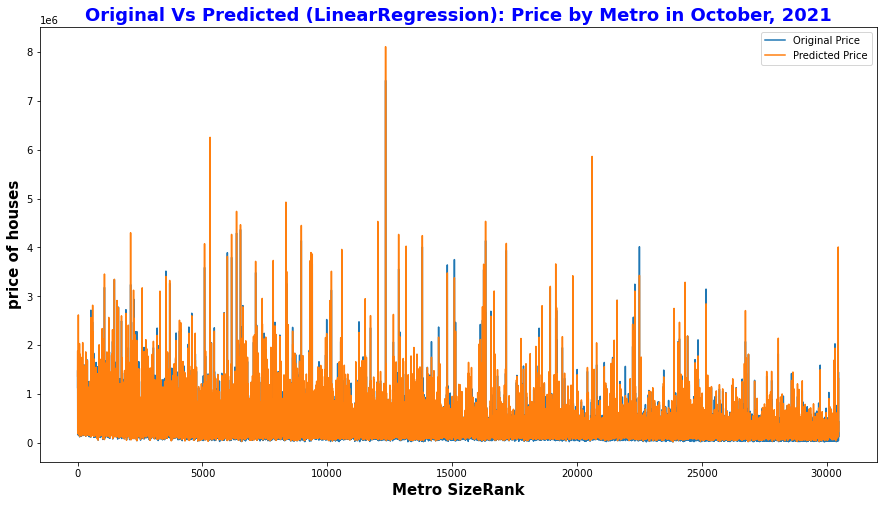

In [56]:
plt.figure(figsize=(15,8))
plt.plot(House_data_imputed.index,House_data_imputed['2021-10-31'], label='Original Price')
plt.plot(House_data_imputed.index,T_Predict, label='Predicted Price')
plt.xlabel('Metro SizeRank', fontsize='15', color='black', fontweight='bold')
plt.ylabel('price of houses',fontsize='15', color='black', fontweight='bold')
plt.title("Original Vs Predicted (LinearRegression): Price by Metro in October, 2021", fontsize='18',color='blue', fontweight='bold')
plt.legend()

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
Estimate=[]
Grad_value=[]
Prediction_Value=[]
DateToPrecict='2021-10-31'
X_test=prepare_X_test(DateToPrecict)
for j in range(len(Y_train.columns)):
    est=GradientBoostingRegressor(n_estimators=1000, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(X_train, Y_train[j])
    Estimate.append(est)
    gradient=est.score(X_train, Y_train[j])
    Grad_value.append(gradient)
    pred = est.predict(X_test)
    Prediction_Value.append(pred)

In [ ]:
for i in range(0,len(Prediction_Value)):
    print("Predicted House Price: ", Prediction_Value[i], "\tgradient: ", Grad_value[i])

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(House_data_imputed.index,House_data_imputed['2021-10-31'], label='Original Price')
plt.plot(House_data_imputed.index,Prediction_Value, label='Predicted price')
plt.xlabel('Metro SizeRank', fontsize='15', color='black', fontweight='bold')
plt.ylabel('price of houses',fontsize='15', color='black', fontweight='bold')
plt.title("Original Vs Predicted (GradientBoostingRegressor): Price by Metro in October, 2021", fontsize='18',color='green', fontweight='bold')
plt.legend()

In [ ]:

def FindTopBottomValues(Prediction_Value_i, Original_House_price_i):
    #reshaping predicted values
    Prediction_Value_=np.array(Prediction_Value_i).reshape(-1,1)
    #converting to dictionary
    Sorted_Predict= dict(enumerate(Prediction_Value_.flatten(), 1))
    #sorting values
    Sorted_Predict={k: v for k, v in sorted(Sorted_Predict.items(), key=lambda item: item[1])}
    els = list(Sorted_Predict.items())
    #getting top values from bottom
    Top_P=[]
    for p in range(1,6):
        Top_P.append(els[-p])
        p+=1
    Top_P=dict(Top_P)

    #getting bottom values from top
    Bottom_P=[]
    for p in range(0,5):
        Bottom_P.append(els[p])
        p+=1
    Bottom_P=dict(Bottom_P)
    
    #reshaping
    Original_House_price=np.array(Original_House_price_i).reshape(-1,1)
    #converting to dictionary
    Sorted_original= dict(enumerate(Original_House_price.flatten(), 1))
    #sorting
    Sorted_Original_Item = sorted(Sorted_original, key = lambda k: Sorted_Predict[k])
    Top_O=[]
    Bottom_O=[]
    #getting top original key
    for p in range(1,6):
        Top_O.append(Sorted_Original_Item[-p])
        p+=1
    #getting bottom original key
    for p in range(0,5):
        Bottom_O.append(Sorted_Original_Item[p])
        p+=1
    
    #getting top original values
    Top_O_V={}
    for item in Top_O:
        if item in Sorted_original.keys():
            Top_O_V[item]=Sorted_original[item]
    #getting bottom original values
    Bottom_O_V={}
    for item in Bottom_O:
        if item in Sorted_original.keys():
            Bottom_O_V[item]=Sorted_original[item]
    #getting top metro name
    Top_Metro={}
    for item in Top_O:
        if item in house.index:
            Top_Metro[item]=house.iloc[item,2]
    #getting bottom metro name
    Bottom_Metro={}
    for item in Bottom_O:
        if item in house.index:
            Bottom_Metro[item]=house.iloc[item,2]
    Top_Metro_Name1=list(Top_Metro.values())
    Bottom_Metro_Name1=list(Bottom_Metro.values())
    return Top_P, Bottom_P,Top_O_V,Bottom_O_V,Top_Metro_Name1,Bottom_Metro_Name1

In [ ]:
House_data_processing=House_data_imputed['2021-10-31'].copy()
Top_Pp, Bottom_Pp, Top_O_Vv, Bottom_O_Vv, Top_Metro_Name, Bottom_Metro_Name =FindTopBottomValues(Prediction_Value, House_data_processing)
DD2=list(Top_Pp.values())
DD1=list(Top_O_Vv.values())
FormattedDD2 = [ '%.2f' % elem for elem in DD2 ]
FormattedDD1 = [ '%.2f' % elem for elem in DD1 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("Original House Price: ", FormattedDD1)
output1 = np.round(DD1).astype(int)
print("Predicted House Price:", FormattedDD2)
output2 = np.round(DD2).astype(int)

data = [output1,output2]
X = np.arange(len(output2))
fig = plt.figure(figsize=(13,8))


ax = fig.add_axes([0,0,1,1])
plt.xlabel("Metropolitan Name",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Original Vs Predicted: Top expensive Metro in October, 2021", fontsize='25',color='blue', fontweight='bold')
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='Original Price')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='Predicted Price')

plt.xticks(X + 0.25/2,Top_Metro_Name, fontsize='14', color='red', fontweight='bold')
plt.legend()
plt.show()


In [ ]:
BottomDD2=list(Bottom_Pp.values())
BottomDD1=list(Bottom_O_Vv.values())
BottomFormattedDD2 = [ '%.2f' % elem for elem in BottomDD2 ]
BottomFormattedDD1 = [ '%.2f' % elem for elem in BottomDD1 ]

In [ ]:
print("Original House Price: ", BottomFormattedDD1)
output1 = np.round(BottomDD1).astype(int)
print("Predicted House Price:", BottomFormattedDD2)
output2 = np.round(BottomDD2).astype(int)

data = [output1,output2]
X = np.arange(len(output2))
fig = plt.figure(figsize=(12,7))


ax = fig.add_axes([0,0,1,1])
plt.xlabel("Metropolitan Name",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Original Vs Predicted: Less expensive Metro in October, 2021", fontsize='20',color='blue', fontweight='bold')
ax.bar(X + 0.00, data[0], color = 'yellow', width = 0.25, label='Original Price')
ax.bar(X + 0.25, data[1], color = 'magenta', width = 0.25, label='Predicted Price')

plt.xticks(X + 0.25/2,Bottom_Metro_Name, fontsize='14', color='red', fontweight='bold')
plt.legend()
plt.show()

In [ ]:
Forcasted_House_data=pd.read_csv('/home/rumana/Desktop/DM-Project/Data/zhvf_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [ ]:
Forcasted_House_data.head()

In [ ]:
Metro_F=Forcasted_House_data[Forcasted_House_data['Region']=='Zip']
#Metro_F2=Forcasted_House_data[Forcasted_House_data['Region']=='Msa']
#Metro_F=Metro_F1.append(Metro_F2)
Metro_F

Metro_F['RegionName']=Metro_F['RegionName'].astype(int)

In [ ]:
FromHouseD1=house['RegionName'].copy()
col=len(House_data_imputed.columns)-1
FromHouseD2=House_data_imputed['2021-10-31'].copy()
Dataset_original=pd.merge(FromHouseD1, FromHouseD2, left_index=True, right_index=True)

In [ ]:
Dataset_original['RegionName']=Dataset_original['RegionName'].astype(int)

In [ ]:
Final_Forcast_Table=pd.merge(Dataset_original, Metro_F , on="RegionName")

In [ ]:
Final_Forcast_Table

In [ ]:
Final_Forcast_Table['2022-10-31']= Final_Forcast_Table['2021-10-31'] + ((Final_Forcast_Table['ForecastYoYPctChange'] * Final_Forcast_Table['2021-10-31'])/100)

In [ ]:
Final_Forcast_Table

In [ ]:
DateToPrecict='2022-10-31'
Growth_Prediction=model.predict(prepare_X_test(DateToPrecict))

In [ ]:
T_Predict=Growth_Prediction[0].T
#T_Predict=T_Predict+Intercept_I
for i in range(0,len(T_Predict)):
    print("Prediction:", T_Predict[i], '\tCoefficient:', Coefficient_s[i],'\tIntercept:', Intercept_I[i] )

In [ ]:
Predict_data=Dataset_original.copy()
Predict_data['PredictedPrice']=T_Predict
Predict_data=Predict_data.drop(columns=['2021-10-31'])
Predict_data

In [ ]:
PredictVsOriginal=pd.merge(Predict_data, Final_Forcast_Table , on="RegionName")
PredictVsOriginal

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(PredictVsOriginal.index,PredictVsOriginal['2022-10-31'], label='Forcasted Price')
plt.plot(PredictVsOriginal.index,PredictVsOriginal['PredictedPrice'], label='Predicted Price')
plt.xlabel('Metro SizeRank', fontsize='15', color='black', fontweight='bold')
plt.ylabel('price of houses',fontsize='15', color='black', fontweight='bold')
plt.title("Forcasted Vs Predicted (LinearRegression): Price by Metro in October, 2022", fontsize='18',color='blue', fontweight='bold')
plt.legend()

In [ ]:
House_data_processing=PredictVsOriginal['2022-10-31'].copy()
Prediction_Value_f=PredictVsOriginal['PredictedPrice'].copy()
Top_Pp, Bottom_Pp, Top_O_Vv, Bottom_O_Vv, Top_Metro_Name, Bottom_Metro_Name =FindTopBottomValues(House_data_processing, Prediction_Value_f)
DD2=list(Top_Pp.values())
DD1=list(Top_O_Vv.values())
FormattedDD2 = [ '%.2f' % elem for elem in DD2 ]
FormattedDD1 = [ '%.2f' % elem for elem in DD1 ]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("Original House Price: ", FormattedDD1)
output1 = np.round(DD1).astype(int)
print("Predicted House Price:", FormattedDD2)
output2 = np.round(DD2).astype(int)

data = [output1,output2]
X = np.arange(len(output2))
fig = plt.figure(figsize=(13,8))


ax = fig.add_axes([0,0,1,1])
plt.xlabel("Metropolitan Name",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Forcasted Vs Predicted: Top expensive Metro in October, 2022", fontsize='25',color='blue', fontweight='bold')
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25, label='Original Price')
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25, label='Predicted Price')

plt.xticks(X + 0.25/2,Top_Metro_Name, fontsize='14', color='red', fontweight='bold')
plt.legend()
plt.show()

In [ ]:
print(FormattedDD1)

In [ ]:
#reshaping
Prediction_Value_mm=np.array(Prediction_Value_f).reshape(-1,1)
#converting to dictionary
Sorted_original= dict(enumerate(Prediction_Value_mm.flatten(), 1))
#sorting
Sorted_Original_Item={k: v for k, v in sorted(Sorted_original.items(), key=lambda item: item[1])}
els = list(Sorted_Original_Item.items())
Top_P=[]
Bottom_P=[]
#getting top original key
for p in range(1,21):
    Top_P.append(els[-p])
    p+=1
#getting bottom original key
for p in range(0,20):
    Bottom_P.append(els[p])
    p+=1
#getting top original values
Top_P_V={}
for i in range(len(Top_P)):
    item=Top_P[i][0]
    if item in Sorted_original.keys():
        Top_P_V[item]=Sorted_original[item]
#getting bottom original values
Bottom_P_V={}
for j in range(len(Bottom_P)):
    item=Bottom_P[j][0]
    if item in Sorted_original.keys():
        Bottom_P_V[item]=Sorted_original[item]
#getting top metro name
Top_Metro={}
for i in range(len(Top_P)):
    item=Top_P[i][0]
    if item in PredictVsOriginal.index:
        Top_Metro[item]=PredictVsOriginal.iloc[item,0]
#getting bottom metro name
Bottom_Metro={}
for j in range(len(Bottom_P)):
    item=Bottom_P[j][0]
    if item in PredictVsOriginal.index:
        Bottom_Metro[item]=PredictVsOriginal.iloc[item,0]
Top_Metro_NameP=list(Top_Metro.values())
Bottom_Metro_NameP=list(Bottom_Metro.values())

In [ ]:
print(Top_Metro_NameP)
print(Bottom_Metro_NameP)

In [ ]:
#reshaping
Original_House_pricemm=np.array(House_data_processing).reshape(-1,1)
#converting to dictionary
Sorted_original= dict(enumerate(Original_House_pricemm.flatten(), 1))
#sorting
Sorted_Original_Item={k: v for k, v in sorted(Sorted_original.items(), key=lambda item: item[1])}
els = list(Sorted_Original_Item.items())
Top_O=[]
Bottom_O=[]
#getting top original key
for p in range(1,21):
    Top_O.append(els[-p])
    p+=1
#getting bottom original key
for p in range(0,20):
    Bottom_O.append(els[p])
    p+=1
#getting top original values
Top_O_V={}
for i in range(len(Top_O)):
    item=Top_O[i][0]
    if item in Sorted_original.keys():
        Top_O_V[item]=Sorted_original[item]
#getting bottom original values
Bottom_O_V={}
for j in range(len(Bottom_O)):
    item=Bottom_O[j][0]
    if item in Sorted_original.keys():
        Bottom_O_V[item]=Sorted_original[item]
#getting top metro name
Top_Metro={}
for i in range(len(Top_O)):
    item=Top_O[i][0]
    if item in PredictVsOriginal.index:
        Top_Metro[item]=PredictVsOriginal.iloc[item,0]
#getting bottom metro name
Bottom_Metro={}
for j in range(len(Bottom_O)):
    item=Bottom_O[j][0]
    if item in PredictVsOriginal.index:
        Bottom_Metro[item]=PredictVsOriginal.iloc[item,0]
Top_Metro_NameF=list(Top_Metro.values())
Bottom_Metro_NameF=list(Bottom_Metro.values())
    

In [ ]:
DD2=list(Top_P_V.values())
DD1=list(Top_O_V.values())
FormattedDD2 = [ '%.2f' % elem for elem in DD2 ]
FormattedDD1 = [ '%.2f' % elem for elem in DD1 ]

In [ ]:
#print("Original House Price: ", FormattedDD1)
output1 = np.round(DD1).astype(int)
#print("Predicted House Price:", FormattedDD2)
output2 = np.round(DD2).astype(int)

data = [output1,output2]
X = np.arange(len(output2))
fig = plt.figure(figsize=(15,26))


plt.subplot(2,1,1)
#This will create the bar graph for poulation
plt.bar(X + 0.00, data[0], color = 'r', width = 0.30, label='Forcasted Price')
plt.xlabel("Zipcode",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Top expensive Zipcode in October, 2022 on Forcasted Price", fontsize='25',color='red', fontweight='bold')
plt.xticks(X + 0.30/2,Top_Metro_NameF, fontsize='14', color='red', fontweight='bold',rotation=90)
plt.legend()
fig.tight_layout(pad=3.0)
#The below code will create the second plot.
plt.subplot(2,1,2)
#This will create the bar graph for gdp i.e gdppercapita divided by population.
plt.bar(X + 0.25, data[1], color = 'b', width = 0.30, label='Predicted Price')
plt.xlabel("Zipcode",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Top expensive Zipcode in October, 2022 on Predicted Price:", fontsize='25',color='blue', fontweight='bold')
plt.xticks(X + 0.30/2,Top_Metro_NameP, fontsize='14', color='red', fontweight='bold',rotation=90)
plt.legend()
plt.show()

In [ ]:
BottomDD2=list(Bottom_P_V.values())
BottomDD1=list(Bottom_O_V.values())
BottomFormattedDD2 = [ '%.2f' % elem for elem in BottomDD2 ]
BottomFormattedDD1 = [ '%.2f' % elem for elem in BottomDD1 ]

In [ ]:
#print("Original House Price: ", BottomFormattedDD1)
output1 = abs(np.round(BottomDD1).astype(int))
#print("Predicted House Price:", BottomFormattedDD2)
output2 = abs(np.round(BottomDD2).astype(int))
output2=np.flip(output2)

data = [output1,output2]
X = np.arange(len(output2))
fig = plt.figure(figsize=(16,20))

plt.subplot(2,1,1)
#This will create the bar graph for poulation
plt.bar(X + 0.00, data[0], color = 'yellow', width = 0.30, label='Forcasted Price')
plt.xlabel("Zipcode",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Less expensive Zipcode in October, 2022 on Forcasted Price", fontsize='25',color='red', fontweight='bold')
plt.xticks(X + 0.30/2,Bottom_Metro_NameF, fontsize='14', color='red', fontweight='bold',rotation=90)
plt.legend()
fig.tight_layout(pad=3.0)
#The below code will create the second plot.
plt.subplot(2,1,2)
#This will create the bar graph for gdp i.e gdppercapita divided by population.
plt.bar(X + 0.25, data[1], color = 'magenta', width = 0.30, label='Predicted Price')
plt.xlabel("Zipcode",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Less expensive Zipcode in October, 2022 on Predicted Price:", fontsize='25',color='blue', fontweight='bold')
plt.xticks(X + 0.30/2,Bottom_Metro_NameP, fontsize='14', color='blue', fontweight='bold',rotation=90)
plt.legend()
plt.show()